In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time, strftime, localtime

In [2]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.integrate import quad
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from matplotlib.ticker import AutoMinorLocator
import emcee
import corner

In [3]:
path = "/home/bruno/Documents/ESO/Data/"

In [4]:
m = np.arange(7,12.4,0.2)

def SchreiberMS(m1,z): ## For plotting Schreiber+15 main sequence
    return m1-9 - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m1-9 - 0.36-2.5*np.log10(1+z),0.))**2

def SpeagleMS(m1,z): ## For plotting Speagle+14 main sequence:
    age = cosmo.age(z).value
    return (0.84-0.026*age)*m1-6.51+0.11*age

def CarnallQ(m1,z): ## For plotting Carnall+20 sSFR quiescent limit:
    age = cosmo.age(z).value
    return m1+np.log10(0.2/age)-9

In [11]:
bootes = pd.read_csv(path+"Bootes/Results/results_stacked_peaks_Bootes_2021-11-30.csv")#results_Bootes_processed_2021-08-25.csv")
en1 = pd.read_csv(path+"EN1/Results/results_stacked_peaks_EN1_2021-12-02.csv")#results_Bootes_processed_2021-08-25.csv")
lockman = pd.read_csv(path+"LockmanHole/Results/results_stacked_peaks_LockmanHole_2021-12-02.csv")#results_Bootes_processed_2021-08-25.csv")

In [6]:
bootes

Type Detections Redshift_range  Median_redshift    Mass_range  \
0    IRBQG       True      0.0 - 0.5          0.38710    9.0 - 9.25   
1    IRBQG       True      0.0 - 0.5          0.38230    9.25 - 9.5   
2    IRBQG       True      0.0 - 0.5          0.37930    9.5 - 9.75   
3    IRBQG       True      0.0 - 0.5          0.42260   9.75 - 10.0   
4    IRBQG       True      0.0 - 0.5          0.44495  10.0 - 10.25   
..     ...        ...            ...              ...           ...   
114    NaN        NaN            NaN              NaN           NaN   
115    NaN        NaN            NaN              NaN           NaN   
116    NaN        NaN            NaN              NaN           NaN   
117    NaN        NaN            NaN              NaN           NaN   
118    NaN        NaN            NaN              NaN           NaN   

     Median_mass  Count  IR_detected  Radio_detected  IRRadio_detected  ...  \
0       9.113915   36.0         36.0             0.0               0.0  ...   
1       9.387602   17.0         17.0             0.0               0.0  ...   
2       9.627714   15.0         15.0             0.0               0.0  ...   
3       9.882643   20.0         20.0             0.0               0.0  ...   
4      10.121477   20.0         20.0             1.0               0.0  ...   
..           ...    ...          ...             ...               ...  ...   
114          NaN    NaN          NaN             NaN               NaN  ...   
115          NaN    NaN          NaN             NaN               NaN  ...   
116          NaN    NaN          NaN             NaN               NaN  ...   
117          NaN    NaN          NaN             NaN               NaN  ...   
118          NaN    NaN          NaN             NaN               NaN  ...   

     Magphys_Type  Magphys_Count  Magphys_Radio_detected  \
0             NaN            NaN                     NaN   
1             NaN            NaN                     NaN   
2           IRBQG            3.0                     0.0   
3           IRBQG            8.0                     0.0   
4           IRBQG            7.0                     0.0   
..            ...            ...                     ...   
114           SFG            1.0                     0.0   
115           SFG            1.0                     0.0   
116           SFG            1.0                     0.0   
117           SFG            2.0                     0.0   
118           SFG            1.0                     0.0   

     Magphys_Median_redshift  Magphys_Median_mass  Magphys_Mean_SFR  \
0                        NaN                  NaN               NaN   
1                        NaN                  NaN               NaN   
2                    0.34180         4.369000e+09          0.181987   
3                    0.41385         8.055500e+09          0.212848   
4                    0.45930         1.380000e+10          0.282949   
..                       ...                  ...               ...   
114                  0.59550         9.421000e+07          0.007174   
115                  0.63770         3.094000e+08          0.191500   
116                  0.59230         7.177000e+08          0.262400   
117                  0.54645         6.352000e+11         43.855000   
118                  0.66600         4.311000e+12         57.120000   

     Magphys_Std_SFR  Magphys_Median_SFR  Magphys_Lower_SFR  Magphys_Upper_SFR  
0                NaN                 NaN                NaN                NaN  
1                NaN                 NaN                NaN                NaN  
2           0.261281            0.037480           0.008568           0.303362  
3           0.213089            0.176050           0.128737           0.084102  
4           0.208243            0.339200           0.301846           0.144320  
..               ...                 ...                ...                ...  
114              NaN            0.007174           0.000000    

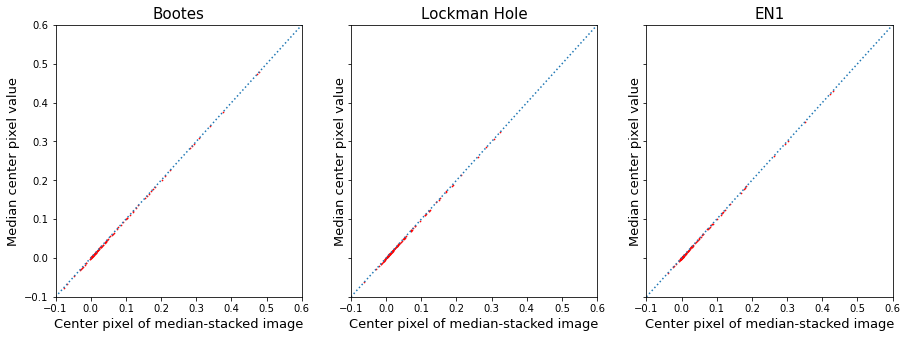

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharex='row',sharey='row')
ax[0].scatter(bootes['LOFAR_peak_stack'],bootes['LOFAR_median_peak'],s=0.5,color='r')
ax[0].plot([-.1,.6],[-.1,.6],':')
ax[0].set_title('Bootes',size=15)
ax[1].scatter(lockman['LOFAR_peak_stack'],lockman['LOFAR_median_peak'],s=0.5,color='r')
ax[1].plot([-.1,.6],[-.1,.6],':')
ax[1].set_title('Lockman Hole',size=15)
ax[2].scatter(en1['LOFAR_peak_stack'],en1['LOFAR_median_peak'],s=0.5,color='r')
ax[2].plot([-.1,.6],[-.1,.6],':')
ax[2].set_title('EN1',size=15)
ax[2].set_xlim(-.1,.6)
ax[2].set_ylim(-.1,.6)
for i in range(3):
    ax[i].set_xlabel('Center pixel of median-stacked image',size=13)
    ax[i].set_ylabel('Median center pixel value',size=13)
plt.show()

## Calculating SFR from LOFAR stacked fluxes

In [16]:
def SFR_smith(flux,flux_unc,mass,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-independant L150-SFR relationship by Smith et al. 2020:
            log10(L150[W Hz^-1]) = 1.058*log10(SFR[Msun/year]) + 22.221
        and mass-dependant L150-SFR relationship by Smith et al. 2020:
            log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msun/year]) + 0.33*log10(M[10^10Msun]) + 22.22
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''   
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    
    beta=1.058
    beta_unc=0.007
    logL1=22.221
    logL1_unc=0.008 
    #log10(L150) = 1.058*log10(SFR) + 22.221
    log10SFR = (np.log10(L150) - logL1)/beta
    SFR = 10**log10SFR
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logL1_unc)**2 )*((SFR/beta)**2)
    
    beta=0.903
    beta_unc=0.012
    logLc=22.218
    logLc_unc=0.016
    gamma=0.332
    gamma_unc=0.037
    #log10(L150) = 0.9*log10(SFR) + 0.33*(M-10) + 22.22
    log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta
    SFR_M = 10**log10SFR
    SFR_M_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR_M)*beta_unc)**2 + (np.log(10)*logLc_unc)**2 + (np.log(10)*(10-mass)*gamma_unc)**2 )*((SFR_M/beta)**2)

    return L150, SFR, np.sqrt(SFR_unc2), SFR_M, np.sqrt(SFR_M_unc2)

SFR_smith_v = np.vectorize(SFR_smith)

In [17]:
# SFR from Smith et al. 2021
bootes['median_L150MHZ'], bootes['median_SFR_smith'], bootes['median_SFR_smith_l'], bootes['median_SFR_smith_M'], bootes['median_SFR_smith_M_l'] = SFR_smith_v(bootes['LOFAR_median_peak'],bootes['LOFAR_lower_peak'],bootes['Median_mass'],bootes['Median_redshift'])
bootes['median_L150MHZ'], bootes['median_SFR_smith'], bootes['median_SFR_smith_u'], bootes['median_SFR_smith_M'], bootes['median_SFR_smith_M_u'] = SFR_smith_v(bootes['LOFAR_median_peak'],bootes['LOFAR_upper_peak'],bootes['Median_mass'],bootes['Median_redshift'])
bootes['mean_L150MHZ'], bootes['mean_SFR_smith'], bootes['mean_SFR_smith_unc'], bootes['mean_SFR_smith_M'], bootes['mean_SFR_smith_M_unc'] = SFR_smith_v(bootes['LOFAR_mean_peak'],bootes['LOFAR_std_peak'],bootes['Median_mass'],bootes['Median_redshift'])

<ipython-input-16-e62bb9fdc8c9>:19: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - logL1)/beta
<ipython-input-16-e62bb9fdc8c9>:30: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta


In [18]:
# SFR from Smith et al. 2021
en1['median_L150MHZ'], en1['median_SFR_smith'], en1['median_SFR_smith_l'], en1['median_SFR_smith_M'], en1['median_SFR_smith_M_l'] = SFR_smith_v(en1['LOFAR_median_peak'],en1['LOFAR_lower_peak'],en1['Median_mass'],en1['Median_redshift'])
en1['median_L150MHZ'], en1['median_SFR_smith'], en1['median_SFR_smith_u'], en1['median_SFR_smith_M'], en1['median_SFR_smith_M_u'] = SFR_smith_v(en1['LOFAR_median_peak'],en1['LOFAR_upper_peak'],en1['Median_mass'],en1['Median_redshift'])
en1['mean_L150MHZ'], en1['mean_SFR_smith'], en1['mean_SFR_smith_unc'], en1['mean_SFR_smith_M'], en1['mean_SFR_smith_M_unc'] = SFR_smith_v(en1['LOFAR_mean_peak'],en1['LOFAR_std_peak'],en1['Median_mass'],en1['Median_redshift'])

<ipython-input-16-e62bb9fdc8c9>:19: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - logL1)/beta
<ipython-input-16-e62bb9fdc8c9>:30: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta


In [19]:
# SFR from Smith et al. 2021
lockman['median_L150MHZ'], lockman['median_SFR_smith'], lockman['median_SFR_smith_l'], lockman['median_SFR_smith_M'], lockman['median_SFR_smith_M_l'] = SFR_smith_v(lockman['LOFAR_median_peak'],lockman['LOFAR_lower_peak'],lockman['Median_mass'],lockman['Median_redshift'])
lockman['median_L150MHZ'], lockman['median_SFR_smith'], lockman['median_SFR_smith_u'], lockman['median_SFR_smith_M'], lockman['median_SFR_smith_M_u'] = SFR_smith_v(lockman['LOFAR_median_peak'],lockman['LOFAR_upper_peak'],lockman['Median_mass'],lockman['Median_redshift'])
lockman['mean_L150MHZ'], lockman['mean_SFR_smith'], lockman['mean_SFR_smith_unc'], lockman['mean_SFR_smith_M'], lockman['mean_SFR_smith_M_unc'] = SFR_smith_v(lockman['LOFAR_mean_peak'],lockman['LOFAR_std_peak'],lockman['Median_mass'],lockman['Median_redshift'])

<ipython-input-16-e62bb9fdc8c9>:19: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - logL1)/beta
<ipython-input-16-e62bb9fdc8c9>:30: RuntimeWarning: invalid value encountered in log10
  log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta


In [8]:
def SFR_CR(flux,z):
    ''' Get the SFR from 150 MHz luminosity, according to the
        L150-SFR relationship by Calistro-Rivera et al. 2017
        SFR150MHz [Msun/year] = 1.455*10^-31*10^q150(z)* L150 [erg/s],
        with q150(z) = 1.72*(1+z)**-0.22
        https://arxiv.org/pdf/1704.06268.pdf
    '''
    # Luminosity in erg s^-1 Hz^-1
    Lerg = (10**-22)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    #Lerg_unc = (10**-22)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    q = 1.544 # for constant q
    #q_unc = 0.019
    
    a = 1.72
    b = 0.22
    qz = a*(1+z)**-b # for q variable with z
    #a_unc = 0.04
    #b_unc = 0.05
    #qz_unc2 = (qz*a_unc/a)**2 + (qz*np.log(1+z)*b_unc)**2
    
    SFR = Lerg*1.455*(10**-31)*(10**q)
    SFRz = Lerg*1.455*(10**-31)*(10**qz)
    
    #SFR_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (np.log(10)*q_unc)**2)*((SFR)**2) )
    #SFRz_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (qz_unc2*np.log(10)**2))*((SFRz)**2) )
    
    return SFR, SFRz

SFR_CR_v = np.vectorize(SFR_CR)

In [9]:
# SFR from Calistro-Rivera et al. 2017
results['SFR_CR'], results['SFR_CR_unc'], results['SFR_CRz'], results['SFR_CRz_unc'] = SFR_CR_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

In [9]:
bootes.loc[(bootes['Type']=='QG')&(bootes['Detections']==1),['Count','Radio_detected','IR_detected','IRRadio_detected']].sum()

Count               82548
Radio_detected       1411
IR_detected         31382
IRRadio_detected       46
dtype: int64

In [10]:
en1.loc[(en1['Type']=='QG')&(en1['Detections']==1),['Count','Radio_detected','IR_detected','IRRadio_detected']].sum()

Count               69202
Radio_detected       1677
IR_detected         21573
IRRadio_detected      104
dtype: int64

In [11]:
lockman.loc[(lockman['Type']=='QG')&(lockman['Detections']==1),['Count','Radio_detected','IR_detected','IRRadio_detected']].sum()

Count               83495
Radio_detected       1988
IR_detected         29389
IRRadio_detected      231
dtype: int64

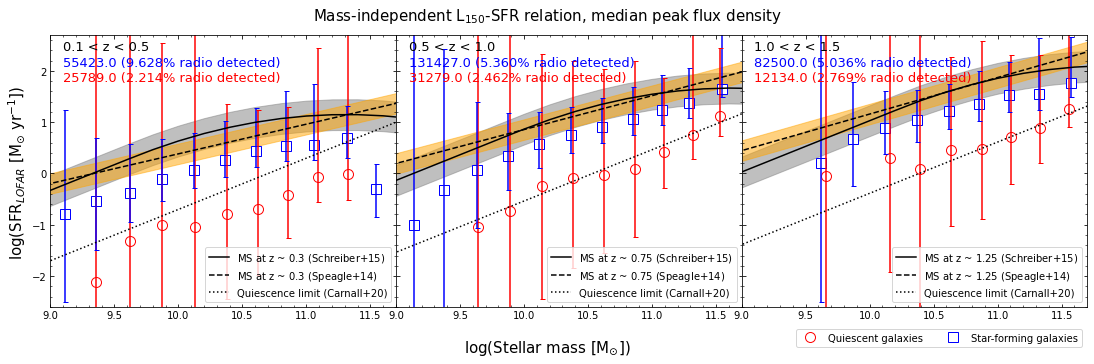

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'median_SFR_smith']),
                   yerr=[data.loc[:,'median_SFR_smith_l']/(data.loc[:,'median_SFR_smith']*np.log(10)),
                        data.loc[:,'median_SFR_smith_u']/(data.loc[:,'median_SFR_smith']*np.log(10))],
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Radio_detected']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'median_SFR_smith']),
                   yerr=[data.loc[:,'median_SFR_smith_l']/(data.loc[:,'median_SFR_smith']*np.log(10)),
                        data.loc[:,'median_SFR_smith_u']/(data.loc[:,'median_SFR_smith']*np.log(10))],
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Radio_detected']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%} radio detected)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%} radio detected)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation, median peak flux density',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

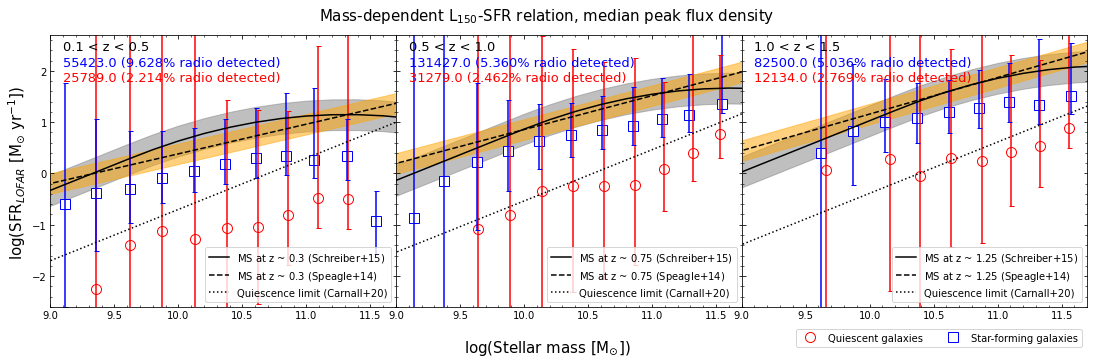

In [35]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'median_SFR_smith_M']),
                   yerr=[data.loc[:,'median_SFR_smith_M_l']/(data.loc[:,'median_SFR_smith_M']*np.log(10)),
                        data.loc[:,'median_SFR_smith_M_u']/(data.loc[:,'median_SFR_smith_M']*np.log(10))],
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Radio_detected']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'median_SFR_smith_M']),
                   yerr=[data.loc[:,'median_SFR_smith_M_l']/(data.loc[:,'median_SFR_smith_M']*np.log(10)),
                        data.loc[:,'median_SFR_smith_M_u']/(data.loc[:,'median_SFR_smith_M']*np.log(10))],
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Radio_detected']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%} radio detected)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%} radio detected)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation, median peak flux density',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

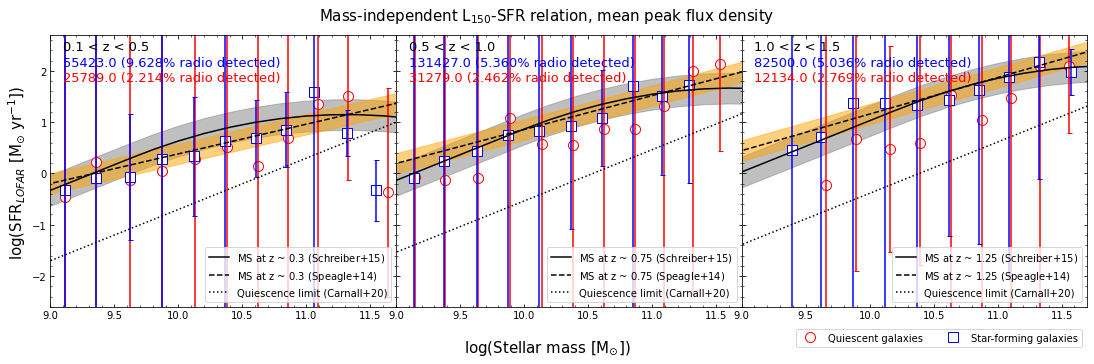

In [36]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'mean_SFR_smith']),
                   yerr=data.loc[:,'mean_SFR_smith_unc']/(data.loc[:,'mean_SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Radio_detected']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'mean_SFR_smith']),
                   yerr=data.loc[:,'mean_SFR_smith_unc']/(data.loc[:,'mean_SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Radio_detected']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%} radio detected)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%} radio detected)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation, mean peak flux density',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

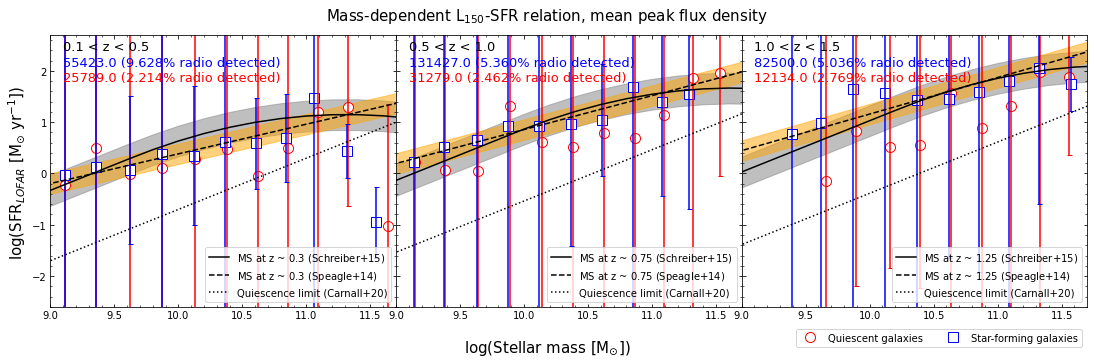

In [37]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'mean_SFR_smith_M']),
                   yerr=data.loc[:,'mean_SFR_smith_M_unc']/(data.loc[:,'mean_SFR_smith_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Radio_detected']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'mean_SFR_smith_M']),
                   yerr=data.loc[:,'mean_SFR_smith_M_unc']/(data.loc[:,'mean_SFR_smith_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Radio_detected']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%} radio detected)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%} radio detected)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation, mean peak flux density',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

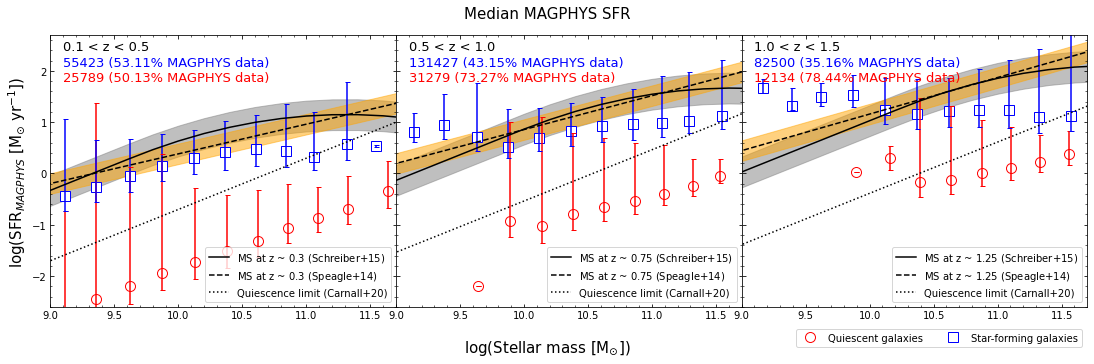

In [38]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'Median_SFR']),
                   yerr=[data.loc[:,'Lower_SFR']/(data.loc[:,'Median_SFR']*np.log(10)),
                        data.loc[:,'Upper_SFR']/(data.loc[:,'Median_SFR']*np.log(10))],
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Magphys_Count']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'Median_SFR']),
                   yerr=[data.loc[:,'Lower_SFR']/(data.loc[:,'Median_SFR']*np.log(10)),
                        data.loc[:,'Upper_SFR']/(data.loc[:,'Median_SFR']*np.log(10))],
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Magphys_Count']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{int(SFG)} ({SFGdetec/SFG:.2%} MAGPHYS data)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{int(QG)} ({QGdetec/QG:.2%} MAGPHYS data)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Median MAGPHYS SFR',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{MAGPHYS}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

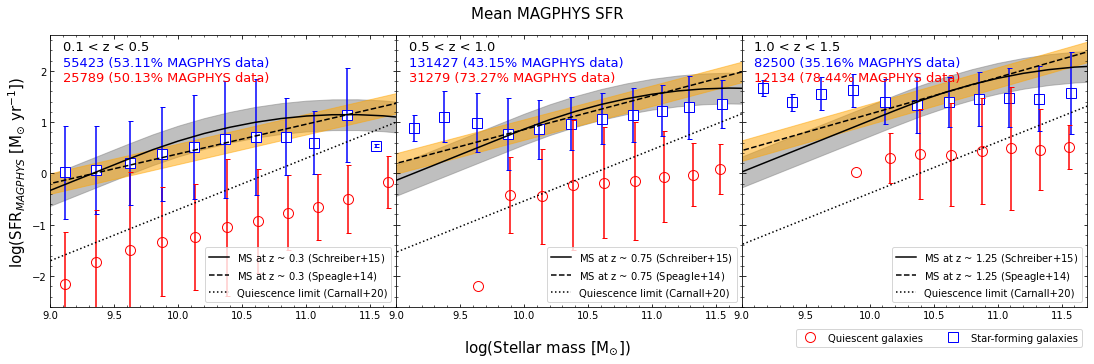

In [39]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'Mean_SFR']),
                   yerr=data.loc[:,'Std_SFR']/(data.loc[:,'Mean_SFR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Magphys_Count']].sum()
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                   np.log10(data.loc[:,'Mean_SFR']),
                   yerr=data.loc[:,'Std_SFR']/(data.loc[:,'Mean_SFR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Magphys_Count']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{int(SFG)} ({SFGdetec/SFG:.2%} MAGPHYS data)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{int(QG)} ({QGdetec/QG:.2%} MAGPHYS data)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mean MAGPHYS SFR',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{MAGPHYS}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

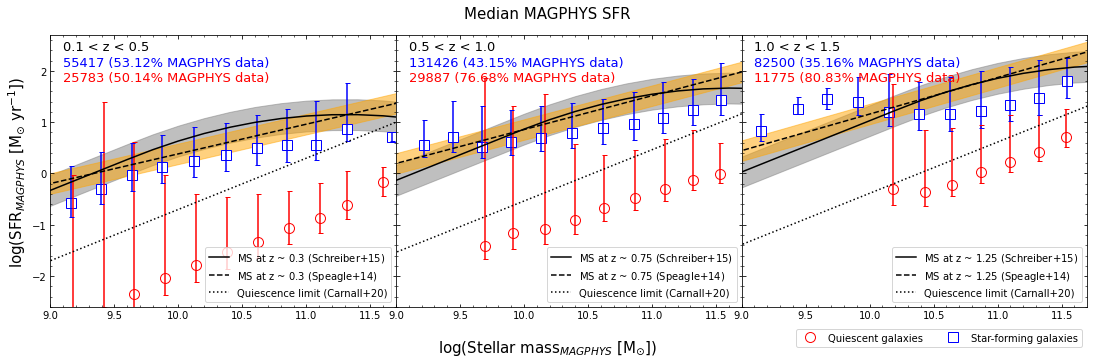

In [40]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Magphys_Median_redshift']>za)&(en1['Magphys_Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Magphys_Type']=='QG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   np.log10(data.loc[:,'Magphys_Median_SFR']),
                   yerr=[data.loc[:,'Magphys_Lower_SFR']/(data.loc[:,'Magphys_Median_SFR']*np.log(10)),
                        data.loc[:,'Magphys_Upper_SFR']/(data.loc[:,'Magphys_Median_SFR']*np.log(10))],
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Magphys_Count']].sum()
    data = en1[(en1['Magphys_Median_redshift']>za)&(en1['Magphys_Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Magphys_Type']=='SFG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   np.log10(data.loc[:,'Magphys_Median_SFR']),
                   yerr=[data.loc[:,'Magphys_Lower_SFR']/(data.loc[:,'Magphys_Median_SFR']*np.log(10)),
                        data.loc[:,'Magphys_Upper_SFR']/(data.loc[:,'Magphys_Median_SFR']*np.log(10))],
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Magphys_Count']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{int(SFG)} ({SFGdetec/SFG:.2%} MAGPHYS data)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{int(QG)} ({QGdetec/QG:.2%} MAGPHYS data)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Median MAGPHYS SFR',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass$_{MAGPHYS}$ [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{MAGPHYS}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

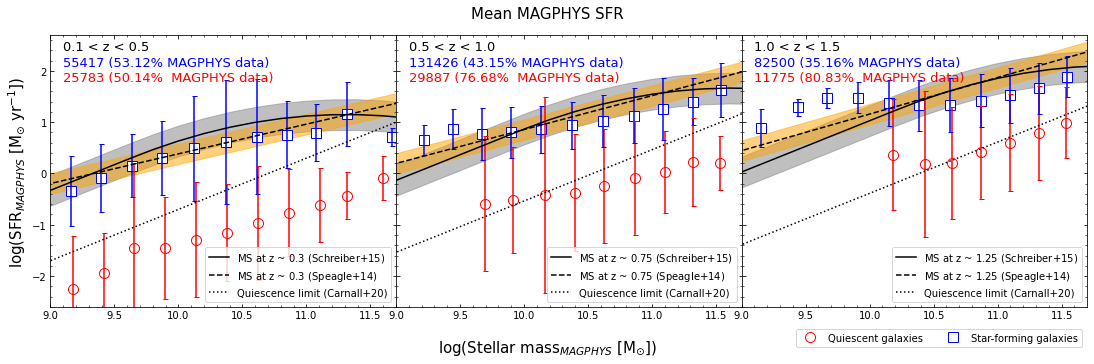

In [41]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = en1[(en1['Magphys_Median_redshift']>za)&(en1['Magphys_Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Magphys_Type']=='QG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   np.log10(data.loc[:,'Magphys_Mean_SFR']),
                   yerr=data.loc[:,'Magphys_Std_SFR']/(data.loc[:,'Magphys_Mean_SFR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:,['Count','Magphys_Count']].sum()
    data = en1[(en1['Magphys_Median_redshift']>za)&(en1['Magphys_Median_redshift']<=zb)&(en1['Detections']==1)&(en1['Magphys_Type']=='SFG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   np.log10(data.loc[:,'Magphys_Mean_SFR']),
                   yerr=data.loc[:,'Magphys_Std_SFR']/(data.loc[:,'Magphys_Mean_SFR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Magphys_Count']].sum()
    
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{int(SFG)} ({SFGdetec/SFG:.2%} MAGPHYS data)',size=13,color='b')
    axs[i].text(9.1,1.8,f'{int(QG)} ({QGdetec/QG:.2%}  MAGPHYS data)',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mean MAGPHYS SFR',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass$_{MAGPHYS}$ [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{MAGPHYS}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

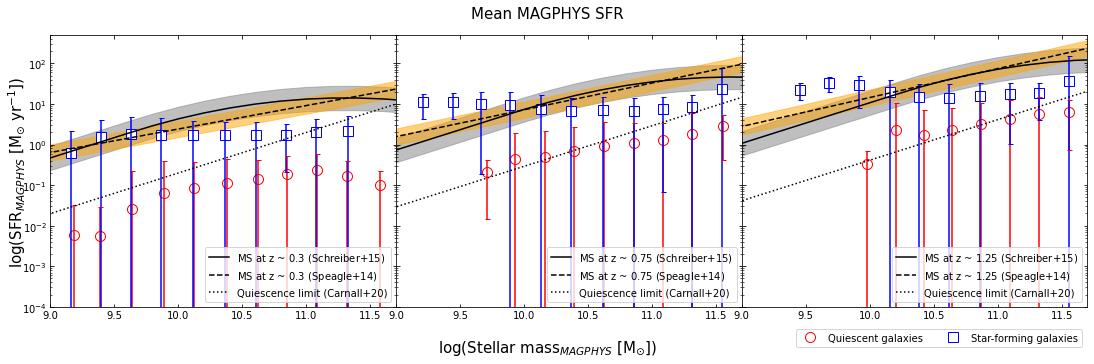

In [7]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = bootes[(bootes['Magphys_Median_redshift']>za)&(bootes['Magphys_Median_redshift']<=zb)&(bootes['Detections']==1)&(bootes['Magphys_Type']=='QG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   data.loc[:,'Magphys_Mean_SFR'],
                   yerr=data.loc[:,'Magphys_Std_SFR'],
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    QG,  QGdetec  = data.loc[:, ['Count','Magphys_Count']].sum()
    data = bootes[(bootes['Magphys_Median_redshift']>za)&(bootes['Magphys_Median_redshift']<=zb)&(bootes['Detections']==1)&(bootes['Magphys_Type']=='SFG')]
    axs[i].errorbar(np.log10(data.loc[:,'Magphys_Median_mass']),
                   data.loc[:,'Magphys_Mean_SFR'],
                   yerr=data.loc[:,'Magphys_Std_SFR'],
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    SFG, SFGdetec = data.loc[:,['Count','Magphys_Count']].sum()

    axs[i].plot(m,np.power(10,SchreiberMS(m,z)),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,np.power(10,SchreiberMS(m,z)-0.3),np.power(10,SchreiberMS(m,z)+0.3),alpha=0.5,color='grey')
    axs[i].plot([8,13],[10**SpeagleMS(8,z),10**SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[10**CarnallQ(8,z),10**CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,10**(SpeagleMS(m,z)-0.2),10**(SpeagleMS(m,z)+0.2),alpha=0.5,color='orange')
    #axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    #axs[i].text(9.1,2.1,f'{int(SFG)} ({SFGdetec/SFG:.2%})',size=13,color='b')
    #axs[i].text(9.1,1.8,f'{int(QG)} ({QGdetec/QG:.2%})',size=13,color='r')
    axs[i].set_ylim(ymin=10**-4,ymax=10**2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].set_yscale('log')
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mean MAGPHYS SFR',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass$_{MAGPHYS}$ [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{MAGPHYS}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

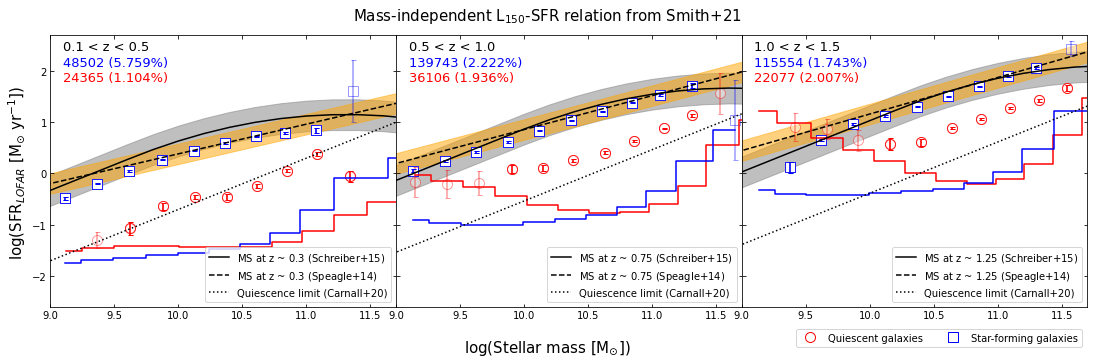

In [43]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

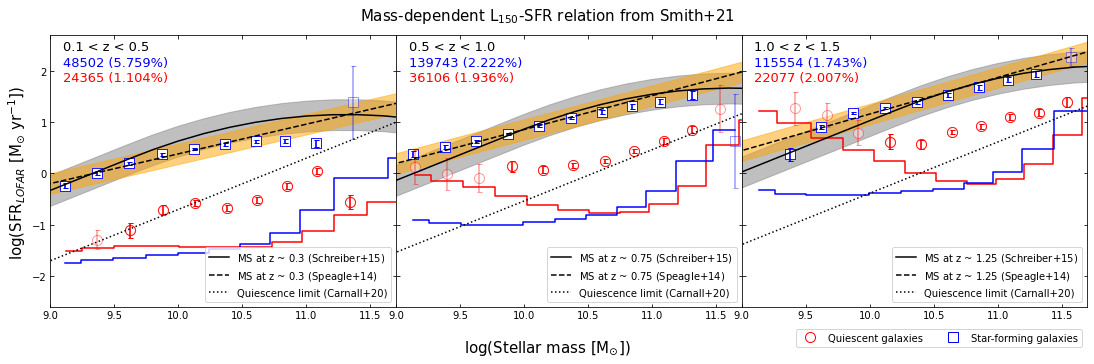

In [41]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


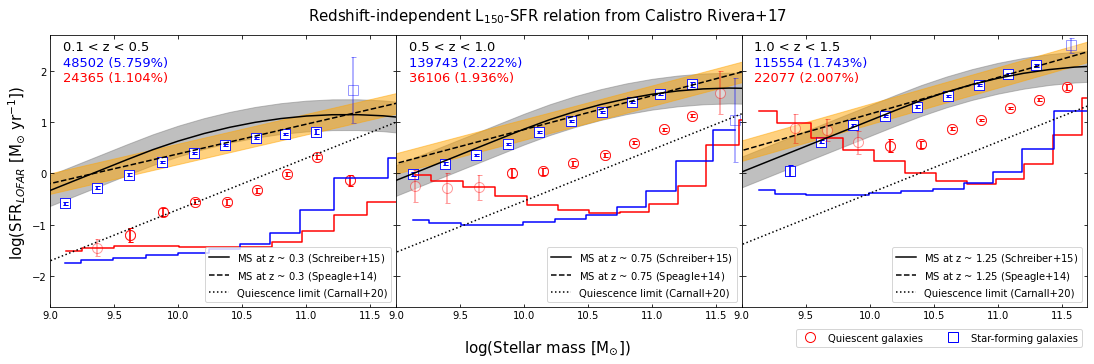

In [44]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


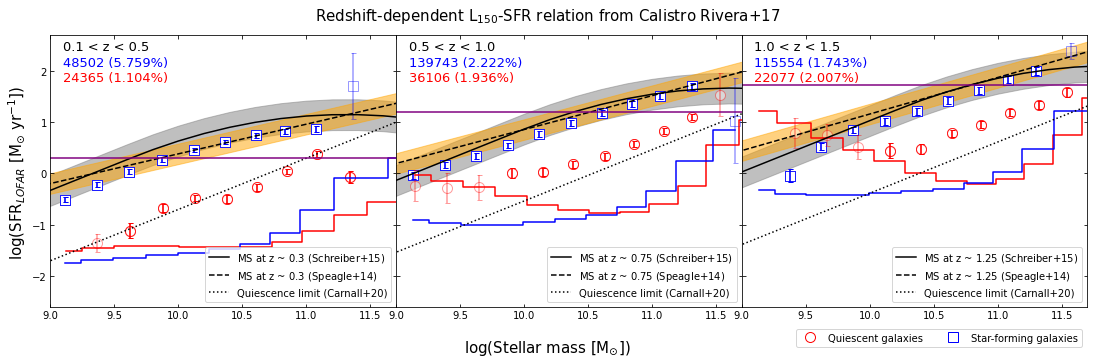

In [45]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Deviations from SFR predicted by main sequence

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


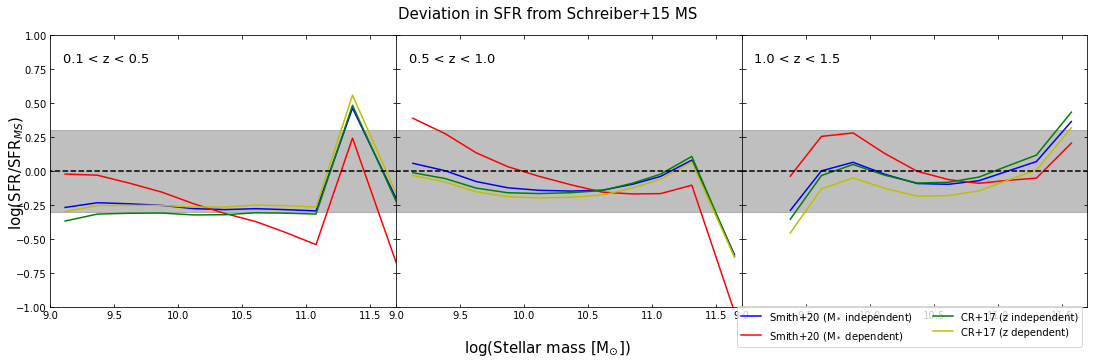

In [101]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


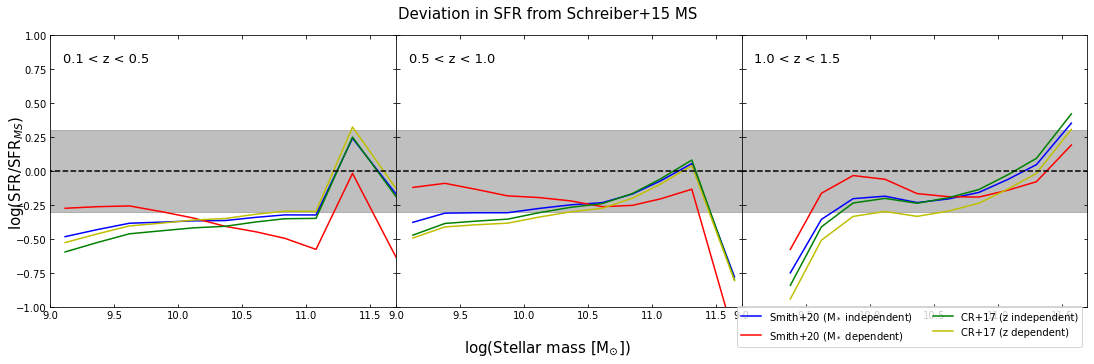

In [12]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


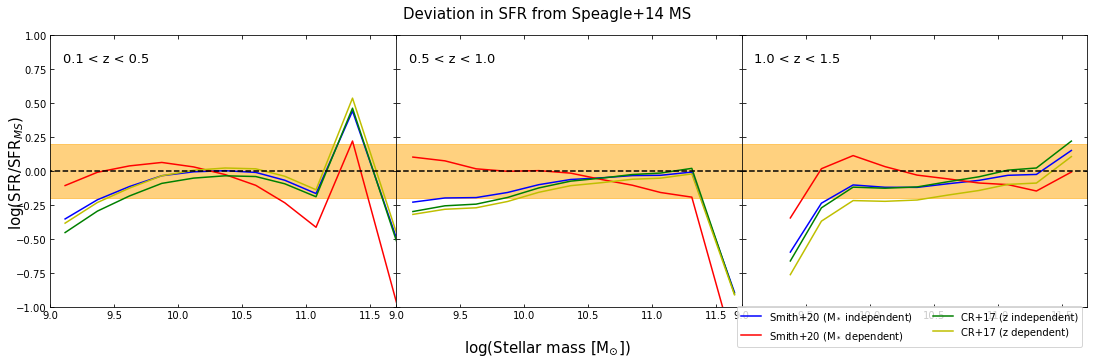

In [102]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Smith+20 (M$_*$ independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith_M'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Smith+20 (M$_*$ dependent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='g', label=f'CR+17 (z independent)')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='y', label=f'CR+17 (z dependent)')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.8,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Smith+20 (M$_*$ independent)')
marker2=plt.errorbar([],[],c='r', label=f'Smith+20 (M$_*$ dependent)')
marker3=plt.errorbar([],[],c='g', label=f'CR+17 (z independent)')
marker4=plt.errorbar([],[],c='y', label=f'CR+17 (z dependent)')
fig.legend(handles=[marker1,marker2,marker3,marker4],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## LOFAR detection fractions

In [43]:
from scipy.stats import beta

In [44]:
def error(k,n):
    c = 0.683 #1sigma confidence
    p_lower = beta.ppf((1-c)/2.,k+1,n-k+1)
    p_upper = beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    err_low = (k/n) - p_lower
    err_up = p_upper - (k/n)
    return err_low,err_up

In [45]:
bootes['radio_frac_err_l'], bootes['radio_frac_err_u'] = error(bootes['Radio_detected'],bootes['Count'])

In [46]:
en1['radio_frac_err_l'], en1['radio_frac_err_u'] = error(en1['Radio_detected'],en1['Count'])

In [47]:
lockman['radio_frac_err_l'], lockman['radio_frac_err_u'] = error(lockman['Radio_detected'],lockman['Count'])

In [48]:
bootes['IR_frac_err_l'], bootes['IR_frac_err_u'] = error(bootes['IR_detected'],bootes['Count'])

In [49]:
en1['IR_frac_err_l'], en1['IR_frac_err_u'] = error(en1['IR_detected'],en1['Count'])

In [50]:
lockman['IR_frac_err_l'], lockman['IR_frac_err_u'] = error(lockman['IR_detected'],lockman['Count'])

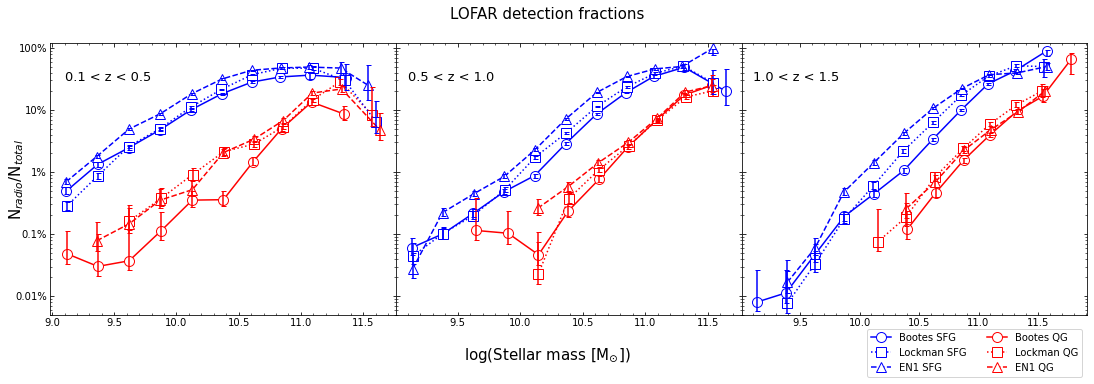

In [64]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = bootes[(bootes['Median_redshift']>za)&(bootes['Median_redshift']<=zb)&(bootes['Radio_detected']>0)&(bootes['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = bootes[(bootes['Median_redshift']>za)&(bootes['Median_redshift']<=zb)&(bootes['Radio_detected']>0)&(bootes['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='o-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['Radio_detected']>0)&(lockman['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='s:',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['Radio_detected']>0)&(lockman['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='s:',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Radio_detected']>0)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='^--',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['Radio_detected']>0)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'Radio_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'radio_frac_err_l'],data.loc[:,'radio_frac_err_u']],
                    fmt='^--',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    
    axs[i].text(9.1,0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin=0.00005,ymax=1.2)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].set_yticks([10.**(n-4) for n in np.arange(0,5)])
    axs[i].set_yticklabels(['0.01%','0.1%','1%','10%','100%'])
    
fig.suptitle('LOFAR detection fractions',fontsize=15)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"N$_{radio}$/N$_{total}$", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Bootes SFG')
marker2=plt.errorbar([],[],fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Bootes QG')
marker3=plt.errorbar([],[],fmt='s:',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Lockman SFG')
marker4=plt.errorbar([],[],fmt='s:',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Lockman QG')
marker5=plt.errorbar([],[],fmt='^--',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='EN1 SFG')
marker6=plt.errorbar([],[],fmt='^--',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='EN1 QG')
fig.legend(handles=[marker1,marker3,marker5,marker2,marker4,marker6],numpoints=1, loc='upper right',bbox_to_anchor=(1,0.1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

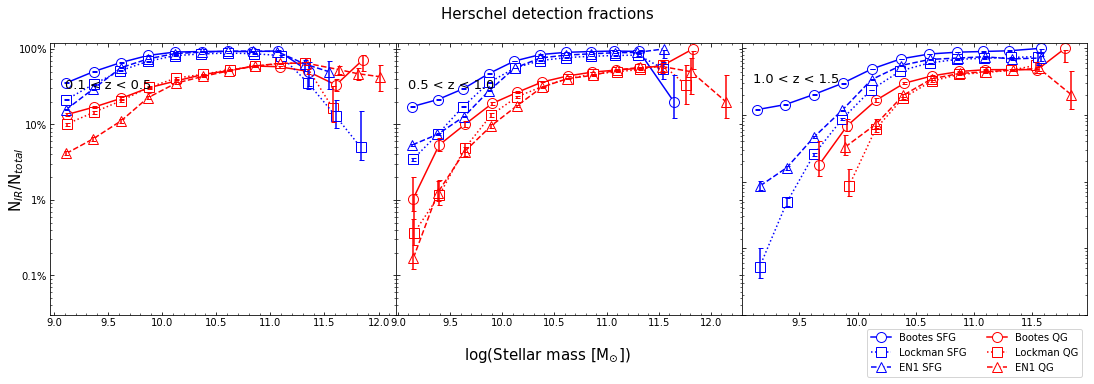

In [67]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey='row')
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = bootes[(bootes['Median_redshift']>za)&(bootes['Median_redshift']<=zb)&(bootes['IR_detected']>0)&(bootes['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = bootes[(bootes['Median_redshift']>za)&(bootes['Median_redshift']<=zb)&(bootes['IR_detected']>0)&(bootes['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='o-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['IR_detected']>0)&(lockman['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='s:',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['IR_detected']>0)&(lockman['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='s:',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['IR_detected']>0)&(en1['Type']=='QG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='^--',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    data = en1[(en1['Median_redshift']>za)&(en1['Median_redshift']<=zb)&(en1['IR_detected']>0)&(en1['Type']=='SFG')]
    axs[i].errorbar(data.loc[:,'Median_mass'],
                    data.loc[:,'IR_detected']/data.loc[:,'Count'],
                    yerr=[data.loc[:,'IR_frac_err_l'],data.loc[:,'IR_frac_err_u']],
                    fmt='^--',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    
    axs[i].text(9.1,0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin=0.0003,ymax=1.2)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].set_yticks([10.**(n-4) for n in np.arange(0,5)])
    axs[i].set_yticklabels(['0.01%','0.1%','1%','10%','100%'])
    
fig.suptitle('Herschel detection fractions',fontsize=15)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"N$_{IR}$/N$_{total}$", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Bootes SFG')
marker2=plt.errorbar([],[],fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Bootes QG')
marker3=plt.errorbar([],[],fmt='s:',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Lockman SFG')
marker4=plt.errorbar([],[],fmt='s:',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Lockman QG')
marker5=plt.errorbar([],[],fmt='^--',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='EN1 SFG')
marker6=plt.errorbar([],[],fmt='^--',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='EN1 QG')
fig.legend(handles=[marker1,marker3,marker5,marker2,marker4,marker6],numpoints=1, loc='upper right',bbox_to_anchor=(1,0.1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

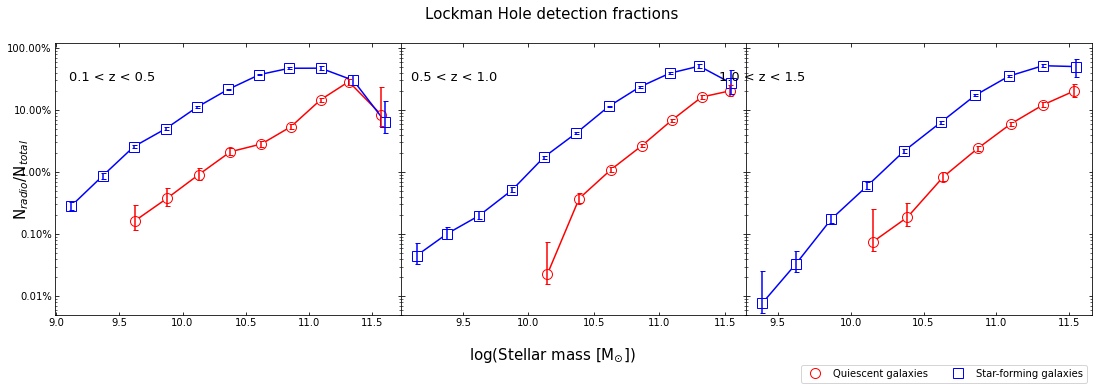

In [39]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['Radio_detected']>0)]
    axs[i].errorbar(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='QG')&(data['Detections']==1),'Radio_detected']/data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='QG')&(data['Detections']==1),'radio_frac_err_l'],data.loc[(data['Type']=='QG')&(data['Detections']==1),'radio_frac_err_u']],
                    fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Radio_detected']/data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='SFG')&(data['Detections']==1),'radio_frac_err_l'],data.loc[(data['Type']=='SFG')&(data['Detections']==1),'radio_frac_err_u']],
                    fmt='s-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].text(9.1,0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin=0.00005,ymax=1.2)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].set_yticks([1/10**n for n in np.arange(0,5)])
    axs[i].set_yticklabels([f'{1/10**n:.2%}' for n in np.arange(0,5)])
    
fig.suptitle('Lockman Hole detection fractions',fontsize=15)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"N$_{radio}$/N$_{total}$", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',color='r',ms=10,label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',color='b',ms=10,label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

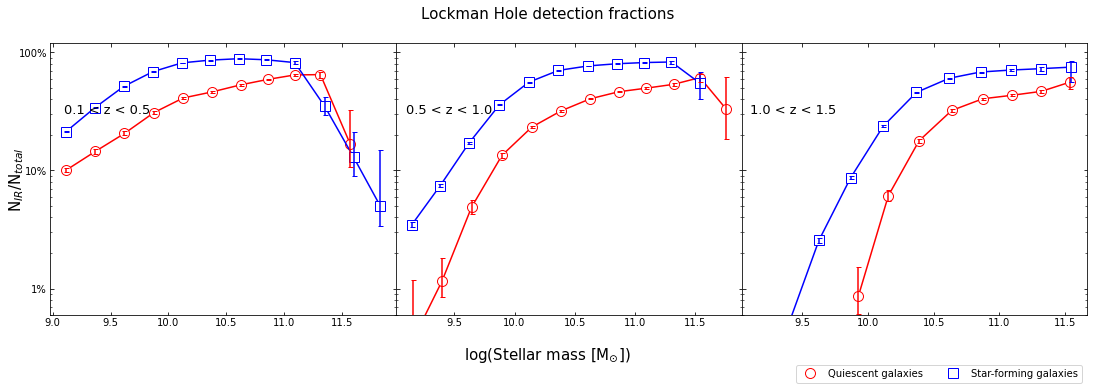

In [49]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = lockman[(lockman['Median_redshift']>za)&(lockman['Median_redshift']<=zb)&(lockman['IR_detected']>0)]
    axs[i].errorbar(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='QG')&(data['Detections']==1),'IR_detected']/data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='QG')&(data['Detections']==1),'IR_frac_err_l'],data.loc[(data['Type']=='QG')&(data['Detections']==1),'IR_frac_err_u']],
                    fmt='o-',mfc='w',mec='r',ms=10,ecolor='r',color='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                    data.loc[(data['Type']=='SFG')&(data['Detections']==1),'IR_detected']/data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'],
                    yerr=[data.loc[(data['Type']=='SFG')&(data['Detections']==1),'IR_frac_err_l'],data.loc[(data['Type']=='SFG')&(data['Detections']==1),'IR_frac_err_u']],
                    fmt='s-',mfc='w',mec='b',ms=10,ecolor='b',color='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].text(9.1,0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ymin=0.006,ymax=1.2)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].set_yticks([1/10**n for n in np.arange(0,3)])
    axs[i].set_yticklabels([f'{1/10**n:.0%}' for n in np.arange(0,3)])
fig.suptitle('Lockman Hole detection fractions',fontsize=15)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"N$_{IR}$/N$_{total}$", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',color='r',ms=10,label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',color='b',ms=10,label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

## Fitting grey body model to Herschel stacked fluxes to calculate SFR

In [6]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [15]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # from mJy to Jy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
        print(z_obj,LIR_LSun,np.log10(LIR_LSun))
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [112]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5])
    y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    elif (~(y_data>0)).all():
        print('No positive fluxes')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        #y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        y_err = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3 # data in mJy
        x_data = x_data[y_data>0]
        y_err = y_err[y_data>0]
        y_data = y_data[y_data>0]
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,sigma=y_err,absolute_sigma=True,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [13]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    elif (np.count_nonzero(y_data>0))<2:
        print('Less than 2 valid data points')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        #y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        x_data = x_data[y_data>0]
        y_data = y_data[y_data>0]
        #print(x_data)
        #print(y_data)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
        print(z_obj,np.log10(LIR_LSun))
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [16]:
results['Tdust'], results['Norm'], results['LIR_H'] = V_Herschel(results['Median_redshift'],results['100_flux(mJy)'],results['160_flux(mJy)'],results['250_flux(mJy)'],results['350_flux(mJy)'],results['500_flux(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998

<ipython-input-15-8426a2e563c5>:20: RuntimeWarning: invalid value encountered in log10
  print(z_obj,LIR_LSun,np.log10(LIR_LSun))
<ipython-input-15-8426a2e563c5>:22: RuntimeWarning: invalid value encountered in log10
  return popt[0], popt[1], np.log10(LIR_LSun)
<ipython-input-6-b7a51d0c57cb>:10: RuntimeWarning: invalid value encountered in double_scalars
  Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)


0.2302 -432182409.9928955 nan
0.2302 -432182409.9928955 nan
Failed fit
0.2676 32712727.03431935 7.514716749768226
0.30845 535649258.2482283 8.728880507850302
0.3374 586951670.1058321 8.768602342694866
0.36005 2569769949.7058797 9.409894246270904
0.37655 3861767913.217628 9.58678616974435
0.39015 3948765544.4597297 9.596461348532653
0.40905 5749376983.464057 9.759620786028218
0.3351 659102095044.8726 11.818952692105931
0.3272 4380177819.194665 9.641491741629089
Failed fit
0.3786 54440669186.46669 10.735923454925928
0.5901 4559568638.412243 9.65892375783579
0.61 9385488842.219004 9.9724568977298
0.6396 2523325997.75201 9.401973362241261
0.6791 4297847928.053064 9.633251044665005
0.6997 6933771766.246267 9.840969542210606
0.7262 15562457708.400068 10.192078184228828
0.76195 28730178314.383633 10.458338321457054
0.7701 39934561948.54711 10.601348924917929
0.7739 47721173076.22686 10.67871111090506
0.7813 44291728390.03807 10.646322628029397
0.8743000000000001 0.1473143288334202 -0.83175500

/home/bruno/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-6-b7a51d0c57cb>:11: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha


1.24335 299347208634.28827 11.476175212772741
1.3645 417404365276.5849 11.620556986669108
0.3384 2625846789.5577297 9.419269382686144
0.3605 6017460011.209845 9.779413212870024
0.3816 12025085818.942852 10.080088184468766
0.3885 23190181667.862835 10.365304150838993
0.3829 37020284474.18274 10.568439751669535
0.3842 53788727658.81927 10.73069127141906
0.3859 70699624331.46939 10.849417106141972
0.3918 75996182337.40425 10.880791776077595
0.4067 69600255883.94934 10.842610836288477
0.32065 38055989844.513756 10.580423022517579
0.4055 70079090209.70474 10.845588455039739
0.7385 9851239766.253767 9.993490889356645
0.76145 15234866273.082258 10.182838646473536
0.769 24235734053.261925 10.384456178193426
0.7838 46085214655.56204 10.66356161468605
0.7969 86705188525.75606 10.938045086872778
0.8038 154085537759.31696 11.187761878393488
0.8059 247701869031.50644 11.393929283562048
0.8126 367754137496.7362 11.565557567550195
0.82645 451235906773.934 11.65440365102254
0.8452500000000001 56598695

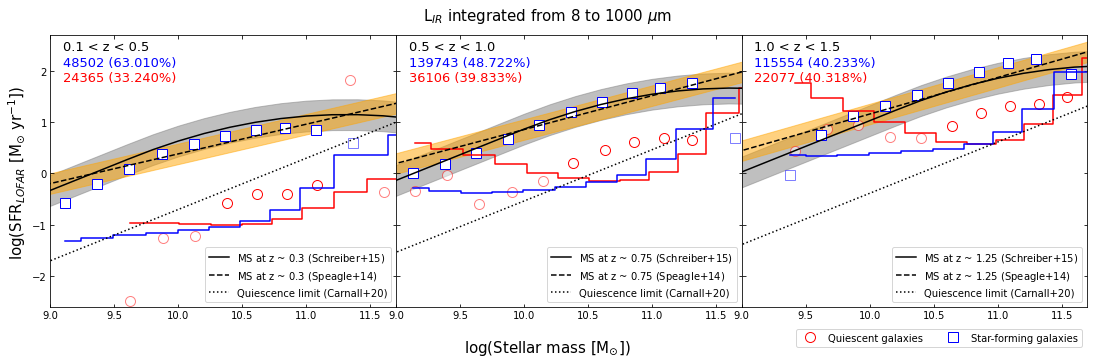

In [10]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

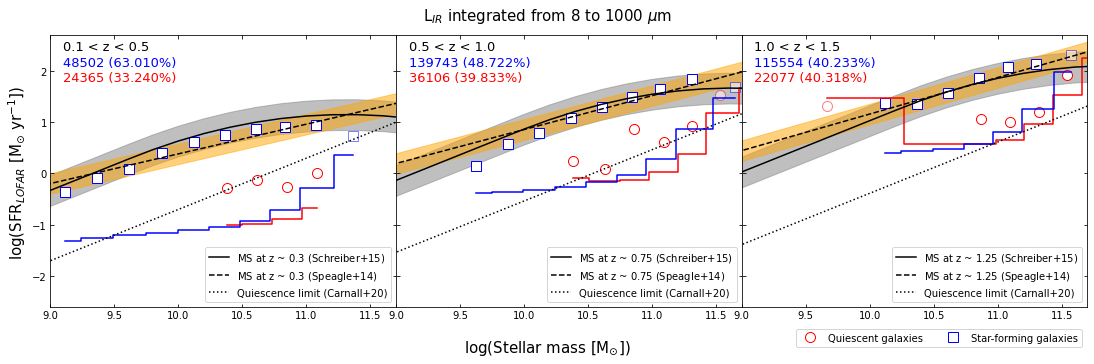

In [73]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR_H_unc']/(data.loc[(data['Type']=='QG'),'SFR_H']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR_H_unc']/(data.loc[(data['Type']=='SFG'),'SFR_H']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR_H']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR_H']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Ratio bewtween LOFAR and Herschel SFRs

In [50]:
results['SFR8_ratio']=results['SFR_smith']/results['SFR8_median']
results['SFR8_ratio_unc']=np.sqrt( (results['SFR8_ratio']**2)*((results['SFR_smith_unc']/results['SFR_smith'])**2 + (results['SFR8_upper']/results['SFR8_median'])**2) )
results['SFR40_ratio']=results['SFR_smith']/results['SFR40_median']
results['SFR40_ratio_unc']=np.sqrt( (results['SFR40_ratio']**2)*((results['SFR_smith_unc']/results['SFR_smith'])**2 + (results['SFR40_upper']/results['SFR40_median'])**2) )

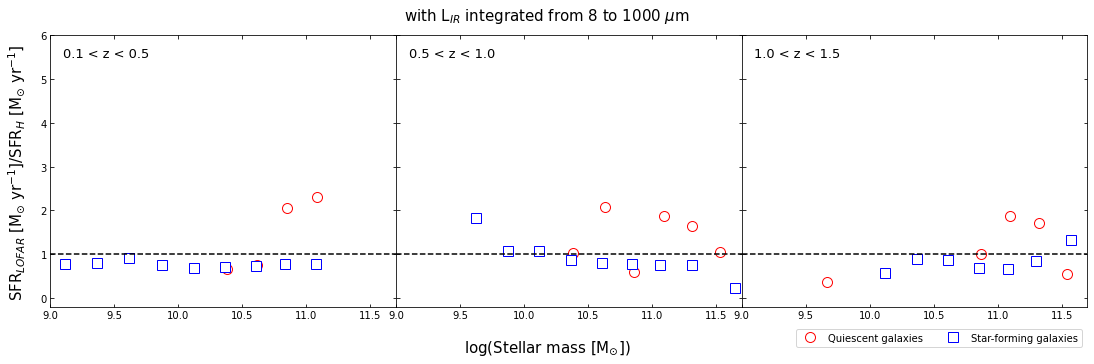

In [205]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR_smith']/data.loc[(data['Type']=='QG'),'SFR_H'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR_smith']/data.loc[(data['Type']=='SFG'),'SFR_H'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


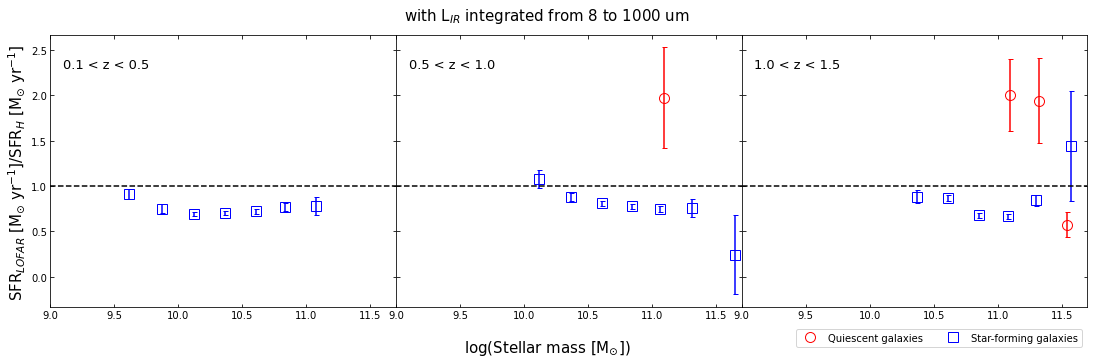

In [80]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,2.3,f'{za} < z < {zb}',size=13,color='k')
    #axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


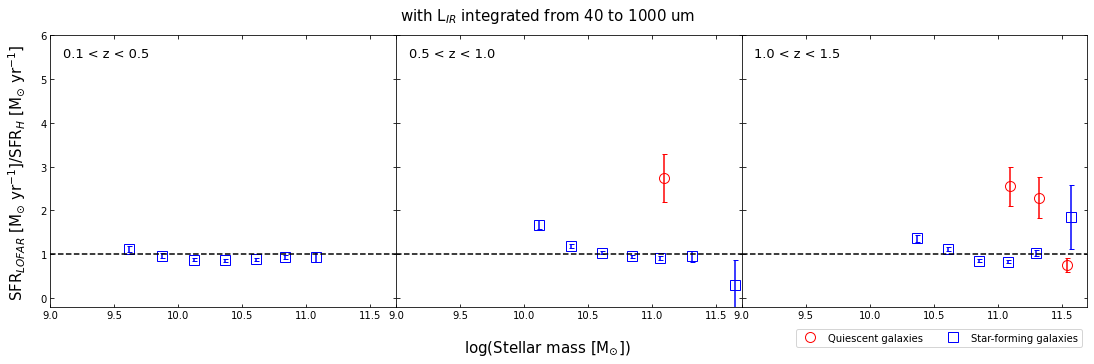

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$]/SFR$_{H}$ [M$_{\odot}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Using emcee to estimate uncertainties on SFR derived from Herschel stacking


In [46]:
def model(theta,x):
    T, Nbb = theta
    a = 2.0
    b = 1.5
    Lc = (26.68 + a*6.246)**-2 + (1.905*(10**-4) + a*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
    return flux

In [47]:
def log_likelihood(theta, x, y, yerr):
    model1 = model(theta,x)    
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )    
    return lnlike

In [48]:
def log_prior(theta):
    T, Nbb = theta
    if 0. < T < 100. and 0. < Nbb:
        return 0.0
    return -np.inf

In [49]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [21]:
def SFR_MCMC(z_obj,Tdust,Norm,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
        
    y = np.array([S1,S2,S3,S4,S5])*10**-3 # data is in mJy
    if (np.count_nonzero(y>0))<2:
        print('Less than 2 valid data points')
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        
        x = np.array([100.,160.,250.,350.,500.])/(1+z_obj) # shift wavelengths to rest-frame
        #y = np.array([S1,S2,S3,S4,S5])*10**-3
        yerr = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3 # data is in mJy
        x = x[y>0]
        yerr = yerr[y>0]
        y = y[y>0]
        initial = np.array([Tdust,Norm])
        print('Initial values: ',initial)
    
        ndim = len(initial)
        nwalkers = 64
        p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(p0, 50000, progress=True);
    
        tau = sampler.get_autocorr_time()
        print('Autocorrelation time: ',tau)
        flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
        print('Chain shape: ',flat_samples.shape)
    
        inds = np.random.randint(len(flat_samples), size=500)
        LIR_list8=[]
        LIR_list40=[]
        SFR_list8=[]
        SFR_list40=[]
        for ind in inds:
            sample = flat_samples[ind]
            dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
            integral8, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
            integral40, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),40,1000) # c/lambda^2 factor gives flux density per unit wavelength
            LIR8 = integral8*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR40 = integral40*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR_LSun8 = LIR8/(3.828*10**26)
            LIR_LSun40 = LIR40/(3.828*10**26)
            LIR_list8.append(np.log10(LIR8/(3.828*10**26)))
            LIR_list40.append(np.log10(LIR40/(3.828*10**26)))
            SFR_list8.append(LIR_LSun8/(1.7*5.8*10**9)) # Kennicutt 1998 + Man 2016
            SFR_list40.append(LIR_LSun40/(1.7*5.8*10**9))
        print('LIR: ',np.percentile(LIR_list8,[16,50,84]))
        print('SFR: ',np.percentile(SFR_list8,[16,50,84]))
        SFR_diff8 = np.diff(np.percentile(SFR_list8,[16,50,84]))
        SFR_diff40 = np.diff(np.percentile(SFR_list40,[16,50,84]))
        print('SFR diff: ',SFR_diff8,'\n')
        
        #return np.median(LIR_list), np.median(SFR_list), SFR_diff[0], SFR_diff[1]
        return np.median(LIR_list8), np.median(LIR_list40), np.median(SFR_list8), np.median(SFR_list40), SFR_diff8[0], SFR_diff40[0], SFR_diff8[1], SFR_diff40[1]

#SFR_MCMC_v = np.vectorize(SFR_MCMC)

In [50]:
def SFR_MCMC(chain_len,z_obj,Tdust,Norm,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    if Norm<=0:
        print('Negative Norm')
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        x = np.array([100.,160.,250.,350.,500.])/(1+z_obj) # shift wavelengths to rest-frame
        y = np.array([S1,S2,S3,S4,S5])*10**-3 # data is in mJy
        yerr = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3
        initial = np.array([Tdust,Norm])
        print('Initial values: ',initial)
    
        ndim = len(initial)
        nwalkers = 64
        p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(p0, chain_len, progress=True);
    
        tau = sampler.get_autocorr_time()
        print('Autocorrelation time: ',tau)
        flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
        print('Chain shape: ',flat_samples.shape)
    
        inds = np.random.randint(len(flat_samples), size=1000)
        LIR_list8=[]
        LIR_list40=[]
        SFR_list8=[]
        SFR_list40=[]
        for ind in inds:
            sample = flat_samples[ind]
            dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
            integral8, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
            integral40, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),40,1000) # c/lambda^2 factor gives flux density per unit wavelength
            LIR8 = integral8*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR40 = integral40*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6) #   c    *   Jy   * 1/micron
            LIR_LSun8 = LIR8/(3.828*10**26)
            LIR_LSun40 = LIR40/(3.828*10**26)
            LIR_list8.append(np.log10(LIR8/(3.828*10**26)))
            LIR_list40.append(np.log10(LIR40/(3.828*10**26)))
            SFR_list8.append(LIR_LSun8/(1.7*5.8*10**9)) # Kennicutt 1998 + Man 2016
            SFR_list40.append(LIR_LSun40/(1.7*5.8*10**9))
        print('LIR: ',np.percentile(LIR_list8,[16,50,84]))
        print('SFR: ',np.percentile(SFR_list8,[16,50,84]))
        SFR_diff8 = np.diff(np.percentile(SFR_list8,[16,50,84]))
        SFR_diff40 = np.diff(np.percentile(SFR_list40,[16,50,84]))
        print('SFR diff: ',SFR_diff8,'\n')
        
        #return np.median(LIR_list), np.median(SFR_list), SFR_diff[0], SFR_diff[1]
        return np.median(LIR_list8), np.median(LIR_list40), np.median(SFR_list8), np.median(SFR_list40), SFR_diff8[0], SFR_diff40[0], SFR_diff8[1], SFR_diff40[1]

#SFR_MCMC_v = np.vectorize(SFR_MCMC)

In [42]:
n=0
try:
    results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_lower'], results.loc[n,'SFR40_lower'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(10000,results.loc[n,'Median_redshift'],30,10000,results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
    if (~np.isnan(results.loc[n,'LIR8_median'])):
        print('Success at : ',n,'\n')
    else:
        print('At : ',n,'\n')
except:
    print('Failed at : ',n,'\n')

  0%|          | 11/10000 [00:00<01:39, 100.69it/s]

Initial values:  [   30 10000]


  1%|          | 71/10000 [00:00<01:49, 90.64it/s] <ipython-input-11-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
  2%|▏         | 180/10000 [00:01<01:18, 124.43it/s]<ipython-input-11-1b206da5e45e>:6: RuntimeWarning: overflow encountered in exp
  Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
 49%|████▉     | 4895/10000 [00:42<00:44, 115.66it/s]<ipython-input-12-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 49%|████▉     | 4919/10000 [00:43<00:46, 109.29it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 50%|█████     | 5015/10000 [00:44<00:45, 109.66it/s]<ipython-input-12-e80b04eba2b5>:3: RuntimeWarning: overflow encountered

Failed at :  0 



In [60]:
n=2
#try:
results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_lower'], results.loc[n,'SFR40_lower'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(50000,results.loc[n,'Median_redshift'],30,10000,results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
if (~np.isnan(results.loc[n,'LIR8_median'])):
    print('Success at : ',n,'\n')
else:
    print('At : ',n,'\n')
#except:
#    print('Failed at : ',n,'\n')

Initial values:  [   30 10000]


  0%|          | 70/50000 [00:00<08:45, 95.03it/s]<ipython-input-46-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
  0%|          | 101/50000 [00:01<08:50, 94.04it/s]<ipython-input-46-1b206da5e45e>:6: RuntimeWarning: overflow encountered in exp
  Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
 10%|▉         | 4899/50000 [00:44<06:46, 111.00it/s]<ipython-input-47-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 10%|█         | 5014/50000 [00:45<06:47, 110.40it/s]<ipython-input-47-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in square
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 18%|█▊        | 9081/50000 [01:24<06:19, 107.91it/s]


ValueError: At least one parameter value was infinite

In [25]:
results.loc[50,['SFR_H','SFR8_median','SFR40_median']]

SFR_H           1.545118
SFR8_median     1.526377
SFR40_median    1.330001
Name: 50, dtype: object

In [28]:
#for n in range(len(results[results['Detections']==0]),len(results)):
for n in range(len(results)):
    try:
        results.loc[n,'LIR8_median'], results.loc[n,'LIR40_median'], results.loc[n,'SFR8_median'], results.loc[n,'SFR40_median'], results.loc[n,'SFR8_lower'], results.loc[n,'SFR40_lower'], results.loc[n,'SFR8_upper'], results.loc[n,'SFR40_upper'] = SFR_MCMC(10000,results.loc[n,'Median_redshift'],results.loc[n,'Tdust'],results.loc[n,'Norm'],results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
        if (~np.isnan(results.loc[n,'LIR8_median'])):
            print('Success at : ',n,'\n')
        else:
            print('At : ',n,'\n')
    except:
        print('Failed at : ',n,'\n')

  0%|          | 0/10000 [00:00<?, ?it/s]

Negative Norm
Failed at :  0 

Initial values:  [nan nan]
Failed at :  1 

Initial values:  [4.97911034e+00 1.10747446e+07]


  1%|          | 56/10000 [00:00<01:47, 92.55it/s]<ipython-input-11-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
  1%|          | 88/10000 [00:00<01:45, 94.21it/s]<ipython-input-11-1b206da5e45e>:6: RuntimeWarning: overflow encountered in exp
  Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
 49%|████▉     | 4933/10000 [00:48<00:45, 110.21it/s]<ipython-input-12-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 50%|█████     | 5025/10000 [00:48<00:46, 107.65it/s]<ipython-input-12-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in square
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
 55%|█████▌    | 5547/10000 [00:53<00:39, 112.75it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce

Failed at :  2 

Initial values:  [2.05460215e+01 8.95238453e+04]


 93%|█████████▎| 9287/10000 [01:21<00:06, 110.46it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/moves/stretch.py:33: RuntimeWarning: overflow encountered in multiply
  return c[rint] - (c[rint] - s) * zz[:, None], factors
  0%|          | 9/10000 [00:00<02:05, 79.55it/s]

Failed at :  3 

Initial values:  [1.26105944e+01 8.33080607e+05]


  0%|          | 8/10000 [00:00<02:22, 70.33it/s]

Failed at :  4 

Initial values:  [2.28221487e+01 1.84975342e+05]


100%|██████████| 10000/10000 [01:38<00:00, 101.27it/s]


Autocorrelation time:  [116.45649529 154.45871771]
Chain shape:  (10624, 2)


  0%|          | 10/10000 [00:00<01:42, 97.88it/s]

LIR:  [9.22939634 9.36763428 9.47936849]
SFR:  [0.17199643 0.23645983 0.30583809]
SFR diff:  [0.06446339 0.06937826] 

Success at :  5 

Initial values:  [2.10473194e+01 3.62667174e+05]


100%|██████████| 10000/10000 [01:42<00:00, 97.71it/s]


Autocorrelation time:  [76.25018113 82.4701093 ]
Chain shape:  (16448, 2)


  0%|          | 10/10000 [00:00<01:48, 91.93it/s]

LIR:  [9.47458214 9.56085547 9.64324017]
SFR:  [0.30248596 0.36895938 0.44602917]
SFR diff:  [0.06647342 0.07706978] 

Success at :  6 

Initial values:  [2.02622281e+01 4.06745327e+05]


100%|██████████| 10000/10000 [01:42<00:00, 97.92it/s]


Autocorrelation time:  [81.10832736 98.59377883]
Chain shape:  (15552, 2)


  0%|          | 9/10000 [00:00<01:54, 87.17it/s]

LIR:  [9.45498731 9.56871541 9.65272778]
SFR:  [0.28914158 0.37569767 0.45588034]
SFR diff:  [0.08655609 0.08018268] 

Success at :  7 

Initial values:  [2.35685947e+01 2.64832746e+05]


100%|██████████| 10000/10000 [01:19<00:00, 126.03it/s]
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/autocorr.py:37: RuntimeWarning: overflow encountered in multiply
  acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/autocorr.py:37: RuntimeWarning: invalid value encountered in multiply
  acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
  0%|          | 0/10000 [00:00<?, ?it/s]/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 45/10000 [00:00<00:22, 442.29it/s]

Failed at :  8 

Initial values:  [6.83416449e+05 7.30357157e-02]


100%|██████████| 10000/10000 [00:21<00:00, 456.22it/s]
/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/backends/backend.py:53: RuntimeWarning: overflow encountered in long_scalars
  v = getattr(self, name)[discard + thin - 1 : self.iteration : thin]
  0%|          | 11/10000 [00:00<01:36, 103.84it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  9 

Initial values:  [2.43426414e+01 2.94261066e+05]


  0%|          | 10/10000 [00:00<01:40, 99.53it/s]

Failed at :  10 

Initial values:  [nan nan]
Failed at :  11 

Initial values:  [3.67050261e+01 4.32523243e+05]


100%|██████████| 10000/10000 [01:40<00:00, 99.68it/s] 


Autocorrelation time:  [138.80776543 139.20563874]
Chain shape:  (8832, 2)


  0%|          | 11/10000 [00:00<01:38, 101.19it/s]

LIR:  [10.73593883 10.73593883 10.73593883]
SFR:  [5.52156151 5.52156153 5.52156155]
SFR diff:  [1.68001666e-08 2.36765896e-08] 

Success at :  12 

Initial values:  [5.42430039e+00 1.46983896e+08]


  0%|          | 11/10000 [00:00<01:33, 106.41it/s]

Failed at :  13 

Initial values:  [  48.77681743 7268.40208999]


  0%|          | 11/10000 [00:00<01:34, 105.31it/s]

Failed at :  14 

Initial values:  [1.21142650e+01 9.51750382e+05]


  0%|          | 11/10000 [00:00<01:32, 107.83it/s]

Failed at :  15 

Initial values:  [1.84270134e+01 1.82226258e+05]


  0%|          | 11/10000 [00:00<01:33, 106.67it/s]

Failed at :  16 

Initial values:  [1.96620549e+01 2.01618245e+05]


  0%|          | 11/10000 [00:00<01:33, 106.37it/s]

Failed at :  17 

Initial values:  [2.26560417e+01 2.14917681e+05]


100%|██████████| 10000/10000 [01:33<00:00, 106.89it/s]


Autocorrelation time:  [61.1974178  68.47182031]
Chain shape:  (20928, 2)


  0%|          | 10/10000 [00:00<01:43, 96.21it/s]

LIR:  [10.11244185 10.18181426 10.24417291]
SFR:  [1.31390794 1.54147819 1.77949191]
SFR diff:  [0.22757024 0.23801373] 

Success at :  18 

Initial values:  [2.27571602e+01 3.45563699e+05]


100%|██████████| 10000/10000 [01:35<00:00, 105.08it/s]


Autocorrelation time:  [37.37166309 38.64842138]
Chain shape:  (35136, 2)


  0%|          | 11/10000 [00:00<01:31, 108.73it/s]

LIR:  [10.41588414 10.45467979 10.49255788]
SFR:  [2.64245275 2.88936839 3.1526878 ]
SFR diff:  [0.24691564 0.2633194 ] 

Success at :  19 

Initial values:  [2.31898682e+01 4.29520860e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.96it/s]


Autocorrelation time:  [35.0391016  35.67104157]
Chain shape:  (37248, 2)


  0%|          | 11/10000 [00:00<01:35, 104.24it/s]

LIR:  [10.57373057 10.59766448 10.62106739]
SFR:  [3.80061309 4.01594327 4.23828817]
SFR diff:  [0.21533018 0.2223449 ] 

Success at :  20 

Initial values:  [2.09135634e+01 8.13927854e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.69it/s]


Autocorrelation time:  [36.69325166 36.84217421]
Chain shape:  (35136, 2)


  0%|          | 11/10000 [00:00<01:36, 103.28it/s]

LIR:  [10.64446598 10.67505124 10.70431588]
SFR:  [4.47289879 4.79926061 5.13380024]
SFR diff:  [0.32636182 0.33453963] 

Success at :  21 

Initial values:  [2.71957808e+01 2.25025270e+05]


100%|██████████| 10000/10000 [01:30<00:00, 110.43it/s]


Autocorrelation time:  [ 93.6007073  119.43989468]
Chain shape:  (13504, 2)


  0%|          | 10/10000 [00:00<01:43, 96.58it/s]

LIR:  [10.4932539  10.60723559 10.70397193]
SFR:  [3.15774457 4.10543083 5.12973608]
SFR diff:  [0.94768626 1.02430525] 

Success at :  22 

Initial values:  [8.35507363e-01 1.25322290e+04]


  0%|          | 11/10000 [00:00<01:34, 105.74it/s]

Failed at :  23 

Initial values:  [3.55903090e+01 7.35454444e+05]


100%|██████████| 10000/10000 [01:29<00:00, 111.57it/s]


Autocorrelation time:  [127.51327606 145.94201677]
Chain shape:  (9728, 2)


<ipython-input-6-b7a51d0c57cb>:11: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
  0%|          | 11/10000 [00:00<01:36, 103.76it/s]

LIR:  [11.13383908 11.27454398 11.38458394]
SFR:  [13.80264146 19.08390029 24.58708619]
SFR diff:  [5.28125883 5.5031859 ] 

Success at :  24 

Initial values:  [1.58274861e+01 1.64610855e+07]


  0%|          | 11/10000 [00:00<01:32, 107.81it/s]

Failed at :  25 

Initial values:  [nan nan]
Failed at :  26 

Initial values:  [1.25648705e+01 2.08961995e+06]


  0%|          | 11/10000 [00:00<01:37, 102.13it/s]

Failed at :  27 

Initial values:  [1.90137551e+01 6.75219788e+05]


  0%|          | 11/10000 [00:00<01:32, 107.85it/s]

Failed at :  28 

Initial values:  [2.53143181e+01 2.24779826e+05]


  0%|          | 11/10000 [00:00<01:33, 107.13it/s]

Failed at :  29 

Initial values:  [2.94508272e+01 6.86656122e+04]


  0%|          | 11/10000 [00:00<01:38, 101.73it/s]

Failed at :  30 

Initial values:  [2.77828825e+01 9.08824639e+04]


  0%|          | 11/10000 [00:00<01:33, 106.33it/s]

Failed at :  31 

Initial values:  [2.49561610e+01 2.40612916e+05]


100%|██████████| 10000/10000 [01:34<00:00, 106.08it/s]


Autocorrelation time:  [51.81135873 54.62999938]
Chain shape:  (25152, 2)


  0%|          | 11/10000 [00:00<01:37, 102.54it/s]

LIR:  [10.85257268 10.90471699 10.95395306]
SFR:  [7.22263714 8.1440433  9.12170756]
SFR diff:  [0.92140616 0.97766426] 

Success at :  32 

Initial values:  [2.57293068e+01 3.71813581e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.55it/s]


Autocorrelation time:  [36.29098686 35.88022406]
Chain shape:  (35136, 2)


  0%|          | 11/10000 [00:00<01:36, 103.25it/s]

LIR:  [11.14799753 11.1741995  11.19893044]
SFR:  [14.260036   15.14685901 16.03442995]
SFR diff:  [0.88682301 0.88757095] 

Success at :  33 

Initial values:  [2.59436759e+01 4.67056596e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.53it/s]


Autocorrelation time:  [35.98536965 35.63313881]
Chain shape:  (37184, 2)


  0%|          | 11/10000 [00:00<01:36, 103.88it/s]

LIR:  [11.29106028 11.31656868 11.34094156]
SFR:  [19.82363827 21.02285843 22.23640851]
SFR diff:  [1.19922017 1.21355007] 

Success at :  34 

Initial values:  [2.44710996e+01 6.09970339e+05]


100%|██████████| 10000/10000 [01:34<00:00, 106.05it/s]


Autocorrelation time:  [52.31842033 55.67191737]
Chain shape:  (24192, 2)


  0%|          | 9/10000 [00:00<01:53, 87.84it/s]

LIR:  [11.28750045 11.33509176 11.38116246]
SFR:  [19.66181193 21.93889998 24.39414199]
SFR diff:  [2.27708805 2.45524201] 

Success at :  35 

Initial values:  [3.47029963e+01 1.67249882e+05]


  0%|          | 11/10000 [00:00<01:34, 105.98it/s]

Failed at :  36 

Initial values:  [1.44873307e+01 1.00418779e+07]


  0%|          | 10/10000 [00:00<01:40, 99.25it/s]

Failed at :  37 

Initial values:  [2.12388568e+01 3.03665563e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.78it/s]


Autocorrelation time:  [41.07666672 43.34532415]
Chain shape:  (31552, 2)


  0%|          | 11/10000 [00:00<01:36, 103.71it/s]

LIR:  [9.36615707 9.41243391 9.45933913]
SFR:  [0.2356569  0.26215431 0.29205339]
SFR diff:  [0.0264974  0.02989909] 

Success at :  38 

Initial values:  [2.28053830e+01 4.33327309e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.79it/s]


Autocorrelation time:  [37.70371149 38.12537246]
Chain shape:  (35136, 2)


  0%|          | 10/10000 [00:00<01:44, 95.52it/s]

LIR:  [9.73785134 9.7762539  9.80979796]
SFR:  [0.55459307 0.60586657 0.65451717]
SFR diff:  [0.0512735 0.0486506] 

Success at :  39 

Initial values:  [2.51892517e+01 4.83566737e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.29it/s]


Autocorrelation time:  [32.63561093 32.8318606 ]
Chain shape:  (39552, 2)


  0%|          | 11/10000 [00:00<01:37, 102.85it/s]

LIR:  [10.05334764 10.07896586 10.10255776]
SFR:  [1.14675521 1.21643512 1.28434251]
SFR diff:  [0.06967991 0.0679074 ] 

Success at :  40 

Initial values:  [2.68007420e+01 6.78024353e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.98it/s]


Autocorrelation time:  [33.57752132 33.80484085]
Chain shape:  (39552, 2)


  0%|          | 11/10000 [00:00<01:32, 107.99it/s]

LIR:  [10.3462577  10.36417423 10.38322997]
SFR:  [2.25102747 2.34583421 2.45105499]
SFR diff:  [0.09480675 0.10522078] 

Success at :  41 

Initial values:  [2.66013100e+01 1.15778764e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.51it/s]


Autocorrelation time:  [30.53982781 30.46783024]
Chain shape:  (42240, 2)


  0%|          | 11/10000 [00:00<01:35, 104.33it/s]

LIR:  [10.55576138 10.56850455 10.58022209]
SFR:  [3.64656928 3.755153   3.85784853]
SFR diff:  [0.10858372 0.10269553] 

Success at :  42 

Initial values:  [2.54542220e+01 2.03128522e+06]


100%|██████████| 10000/10000 [01:36<00:00, 103.76it/s]


Autocorrelation time:  [32.41949358 32.22146751]
Chain shape:  (39552, 2)


  0%|          | 10/10000 [00:00<01:43, 96.20it/s]

LIR:  [10.71937638 10.72974302 10.74065339]
SFR:  [5.31495343 5.443348   5.58182837]
SFR diff:  [0.12839457 0.13848037] 

Success at :  43 

Initial values:  [2.55137862e+01 2.61482595e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.42it/s]


Autocorrelation time:  [32.83836161 32.53930082]
Chain shape:  (39552, 2)


  0%|          | 11/10000 [00:00<01:37, 102.59it/s]

LIR:  [10.83833033 10.84830793 10.85904544]
SFR:  [6.98961763 7.15205776 7.33108954]
SFR diff:  [0.16244013 0.17903178] 

Success at :  44 

Initial values:  [2.44860947e+01 3.26150687e+06]


100%|██████████| 10000/10000 [01:35<00:00, 105.16it/s]


Autocorrelation time:  [33.09013374 33.28678839]
Chain shape:  (39552, 2)


  0%|          | 11/10000 [00:00<01:38, 101.45it/s]

LIR:  [10.86296983 10.87961218 10.89593231]
SFR:  [7.39763521 7.68661745 7.98096495]
SFR diff:  [0.28898223 0.2943475 ] 

Success at :  45 

Initial values:  [2.24460065e+01 4.05754112e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.53it/s]


Autocorrelation time:  [37.01000589 37.73784711]
Chain shape:  (35136, 2)


  0%|          | 11/10000 [00:00<01:35, 104.68it/s]

LIR:  [10.80311105 10.83741256 10.87028368]
SFR:  [6.44516646 6.97486246 7.52327222]
SFR diff:  [0.529696   0.54840976] 

Success at :  46 

Initial values:  [2.51760403e+01 2.30328066e+06]


  0%|          | 11/10000 [00:00<01:32, 107.52it/s]

Failed at :  47 

Initial values:  [1.94027935e+01 8.06437612e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.90it/s]


Autocorrelation time:  [168.59226857 169.34244379]
Chain shape:  (7232, 2)


  0%|          | 11/10000 [00:00<01:36, 103.06it/s]

LIR:  [10.84559626 10.84559627 10.84559627]
SFR:  [7.1075406  7.10754062 7.10754064]
SFR diff:  [1.41718512e-08 1.80294242e-08] 

Success at :  48 

Initial values:  [1.85208075e+01 3.32146159e+05]


100%|██████████| 10000/10000 [01:33<00:00, 106.83it/s]


Autocorrelation time:  [76.83708816 89.38017563]
Chain shape:  (16448, 2)


  0%|          | 11/10000 [00:00<01:38, 101.37it/s]

LIR:  [ 9.92442211  9.98275474 10.04024145]
SFR:  [0.8522073  0.97471541 1.1126656 ]
SFR diff:  [0.12250811 0.13795018] 

Success at :  49 

Initial values:  [2.11142635e+01 2.58744515e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.91it/s]


Autocorrelation time:  [37.28498853 38.8345404 ]
Chain shape:  (35136, 2)


  0%|          | 10/10000 [00:00<01:45, 94.67it/s]

LIR:  [10.14173454 10.17645796 10.2129044 ]
SFR:  [1.40558669 1.52258324 1.65587475]
SFR diff:  [0.11699655 0.13329151] 

Success at :  50 

Initial values:  [2.31741495e+01 2.62393854e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.81it/s]


Autocorrelation time:  [37.42905571 38.25965215]
Chain shape:  (35136, 2)


  0%|          | 11/10000 [00:00<01:31, 109.17it/s]

LIR:  [10.3502053  10.38165926 10.41193138]
SFR:  [2.27158187 2.4422063  2.61851135]
SFR diff:  [0.17062443 0.17630505] 

Success at :  51 

Initial values:  [2.49859144e+01 3.38942523e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.42it/s]


Autocorrelation time:  [32.25870222 32.52975994]
Chain shape:  (39616, 2)


  0%|          | 11/10000 [00:00<01:36, 103.06it/s]

LIR:  [10.64453794 10.66233628 10.68064985]
SFR:  [4.4736399  4.6607882  4.86152959]
SFR diff:  [0.18714829 0.2007414 ] 

Success at :  52 

Initial values:  [2.73716310e+01 4.07810884e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.83it/s]


Autocorrelation time:  [32.3261791  32.45573464]
Chain shape:  (39616, 2)


  0%|          | 11/10000 [00:00<01:36, 103.60it/s]

LIR:  [10.92441601 10.93746891 10.95009276]
SFR:  [8.52195233 8.78197102 9.040987  ]
SFR diff:  [0.26001869 0.25901598] 

Success at :  53 

Initial values:  [2.84196447e+01 6.01165004e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.55it/s]


Autocorrelation time:  [31.22752358 31.22177383]
Chain shape:  (42240, 2)


  0%|          | 10/10000 [00:00<01:44, 95.85it/s]

LIR:  [11.17836383 11.18767754 11.19746255]
SFR:  [15.29279661 15.6243019  15.98032608]
SFR diff:  [0.33150529 0.35602418] 

Success at :  54 

Initial values:  [2.88950973e+01 8.92738047e+05]


100%|██████████| 10000/10000 [01:36<00:00, 103.96it/s]


Autocorrelation time:  [32.69137375 32.63086549]
Chain shape:  (39552, 2)


  0%|          | 10/10000 [00:00<01:41, 98.07it/s]

LIR:  [11.3858193  11.39366023 11.40192864]
SFR:  [24.65712232 25.10633467 25.58890666]
SFR diff:  [0.44921236 0.48257198] 

Success at :  55 

Initial values:  [2.79802726e+01 1.49606458e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.26it/s]


Autocorrelation time:  [30.98957522 30.97909787]
Chain shape:  (42240, 2)


  0%|          | 11/10000 [00:00<01:35, 104.27it/s]

LIR:  [11.55592684 11.56540827 11.57347685]
SFR:  [36.47958815 37.28476042 37.98393362]
SFR diff:  [0.80517227 0.6991732 ] 

Success at :  56 

Initial values:  [2.80558770e+01 1.74006388e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.80it/s]


Autocorrelation time:  [31.63648617 31.5739526 ]
Chain shape:  (42240, 2)


  0%|          | 11/10000 [00:00<01:37, 102.49it/s]

LIR:  [11.64050632 11.65351429 11.66627677]
SFR:  [44.32302657 45.67066933 47.03269403]
SFR diff:  [1.34764276 1.3620247 ] 

Success at :  57 

Initial values:  [2.76191671e+01 2.21293714e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.79it/s]


Autocorrelation time:  [35.8863698  36.60289316]
Chain shape:  (37184, 2)


  0%|          | 11/10000 [00:00<01:37, 102.03it/s]

LIR:  [11.71785094 11.74989066 11.7779246 ]
SFR:  [52.96317733 57.01823295 60.82017841]
SFR diff:  [4.05505562 3.80194546] 

Success at :  58 

Initial values:  [3.51155345e+01 1.19641669e+05]


  0%|          | 11/10000 [00:00<01:33, 106.98it/s]

Failed at :  59 

Negative Norm
Failed at :  60 

Initial values:  [2.26629291e+01 3.60005692e+04]


  0%|          | 11/10000 [00:00<01:34, 106.26it/s]

Failed at :  61 

Initial values:  [2.59006245e+01 1.21145497e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.94it/s]


Autocorrelation time:  [46.30471027 47.75267572]
Chain shape:  (27392, 2)


  0%|          | 11/10000 [00:00<01:38, 101.89it/s]

LIR:  [10.69094701 10.73825973 10.78024337]
SFR:  [4.97817434 5.55114841 6.11457747]
SFR diff:  [0.57297408 0.56342906] 

Success at :  62 

Initial values:  [2.70570034e+01 2.30212488e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.45it/s]


Autocorrelation time:  [32.82965918 33.37305313]
Chain shape:  (39552, 2)


  0%|          | 10/10000 [00:00<01:41, 98.45it/s]

LIR:  [11.08896266 11.11159848 11.13103151]
SFR:  [12.44760372 13.11358888 13.71369847]
SFR diff:  [0.66598516 0.60010959] 

Success at :  63 

Initial values:  [2.88757448e+01 2.81868082e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.44it/s]


Autocorrelation time:  [33.77361861 33.89817344]
Chain shape:  (39552, 2)


  0%|          | 10/10000 [00:00<01:41, 98.55it/s]

LIR:  [11.29084279 11.30906626 11.32609431]
SFR:  [19.81371357 20.66280837 21.48905925]
SFR diff:  [0.8490948  0.82625088] 

Success at :  64 

Initial values:  [3.01679917e+01 3.80781034e+05]


100%|██████████| 10000/10000 [01:36<00:00, 104.10it/s]


Autocorrelation time:  [31.48971105 31.49103668]
Chain shape:  (42240, 2)


  0%|          | 11/10000 [00:00<01:37, 102.19it/s]

LIR:  [11.51084946 11.52313262 11.5336429 ]
SFR:  [32.88308516 33.82639413 34.65500621]
SFR diff:  [0.94330897 0.82861208] 

Success at :  65 

Initial values:  [3.08743252e+01 5.69436664e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.83it/s]


Autocorrelation time:  [30.99066771 31.51087933]
Chain shape:  (42240, 2)


  0%|          | 10/10000 [00:00<01:44, 95.56it/s]

LIR:  [11.74484231 11.75319594 11.76051579]
SFR:  [56.35927468 57.45383495 58.43040199]
SFR diff:  [1.09456027 0.97656704] 

Success at :  66 

Initial values:  [3.17471126e+01 8.04214539e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.50it/s]


Autocorrelation time:  [30.76481885 30.79754832]
Chain shape:  (42240, 2)


  0%|          | 11/10000 [00:00<01:36, 103.27it/s]

LIR:  [11.96363733 11.9711912  11.97919733]
SFR:  [93.27396094 94.91050642 96.67638711]
SFR diff:  [1.63654548 1.76588069] 

Success at :  67 

Initial values:  [3.14351840e+01 1.19951275e+06]


100%|██████████| 10000/10000 [01:36<00:00, 103.58it/s]


Autocorrelation time:  [29.78958287 30.06073136]
Chain shape:  (45248, 2)


  0%|          | 11/10000 [00:00<01:36, 103.38it/s]

LIR:  [12.1412914  12.15018179 12.15944661]
SFR:  [140.41531712 143.31936365 146.40964892]
SFR diff:  [2.90404654 3.09028527] 

Success at :  68 

Initial values:  [3.07289002e+01 1.43940190e+06]


100%|██████████| 10000/10000 [01:35<00:00, 104.21it/s]


Autocorrelation time:  [31.93119612 32.12988645]
Chain shape:  (42240, 2)


  0%|          | 10/10000 [00:00<01:44, 95.85it/s]

LIR:  [12.20685973 12.22301608 12.23957172]
SFR:  [163.29873347 169.48808303 176.07382839]
SFR diff:  [6.18934957 6.58574536] 

Success at :  69 

Initial values:  [2.45998575e+01 1.86581303e+06]


  0%|          | 11/10000 [00:00<01:31, 109.39it/s]

Failed at :  70 

Negative Norm
Failed at :  71 

Initial values:  [3.59048779e+01 3.24220316e+05]


100%|██████████| 10000/10000 [01:35<00:00, 104.45it/s]


Autocorrelation time:  [157.51718331 157.66392376]
Chain shape:  (7808, 2)


  0%|          | 10/10000 [00:00<01:44, 95.76it/s]

LIR:  [11.96301529 11.96301529 11.96301529]
SFR:  [93.14045848 93.14045864 93.14045883]
SFR diff:  [1.63275743e-07 1.94626665e-07] 

Success at :  72 

Initial values:  [   62.51857581 24484.40556284]


100%|██████████| 10000/10000 [01:19<00:00, 125.77it/s]


Failed at :  73 



In [41]:
results.to_csv(path+'Results/results_Bootes_processed_'+strftime("%Y-%m-%d",localtime())+'.csv',index=False)

In [57]:
results_bad = results.loc[~np.isfinite(results['LIR8_median']),:]

In [58]:
results_bad.index

Int64Index([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 13, 14, 15, 16, 17, 23, 26, 27,
            28, 29, 30, 31, 36, 37, 47, 59, 60, 61, 70, 71, 73],
           dtype='int64')

In [100]:
#for n in range(len(results[results['Detections']==0]),len(results)):
for n in results_bad.index:
    try:
        #results_bad.loc[n,'LIR8_median'], results_bad.loc[n,'LIR40_median'], results_bad.loc[n,'SFR8_median'], results_bad.loc[n,'SFR40_median'], results_bad.loc[n,'SFR8_lower'], results_bad.loc[n,'SFR40_lower'], results_bad.loc[n,'SFR8_upper'], results_bad.loc[n,'SFR40_upper'] = SFR_MCMC(60000,results_bad.loc[n,'Median_redshift'],results_bad.loc[n,'Tdust'],results_bad.loc[n,'Norm'],results_bad.loc[n,'100_flux(mJy)'],results_bad.loc[n,'160_flux(mJy)'],results_bad.loc[n,'250_flux(mJy)'],results_bad.loc[n,'350_flux(mJy)'],results_bad.loc[n,'500_flux(mJy)'],results_bad.loc[n,'100_std(mJy)'],results_bad.loc[n,'160_std(mJy)'],results_bad.loc[n,'250_std(mJy)'],results_bad.loc[n,'350_std(mJy)'],results_bad.loc[n,'500_std(mJy)'])
        results_bad.loc[n,'LIR8_median'], results_bad.loc[n,'LIR40_median'], results_bad.loc[n,'SFR8_median'], results_bad.loc[n,'SFR40_median'], results_bad.loc[n,'SFR8_lower'], results_bad.loc[n,'SFR40_lower'], results_bad.loc[n,'SFR8_upper'], results_bad.loc[n,'SFR40_upper'] = SFR_MCMC(60000,results_bad.loc[n,'Median_redshift'],results_bad.loc[n,'Tdust'],results_bad.loc[n,'Norm'],results_bad.loc[n,'100_flux(mJy)'],results_bad.loc[n,'160_flux(mJy)'],results_bad.loc[n,'250_flux(mJy)'],results_bad.loc[n,'350_flux(mJy)'],results_bad.loc[n,'500_flux(mJy)'],results_bad.loc[n,'100_flux(mJy)']*0.1,results_bad.loc[n,'160_flux(mJy)']*0.1,results_bad.loc[n,'250_flux(mJy)']*0.1,results_bad.loc[n,'350_flux(mJy)']*0.1,results_bad.loc[n,'500_flux(mJy)']*0.1)
        if (~np.isnan(results.loc[n,'LIR8_median'])):
            print('Success at : ',n,'\n')
        else:
            print('At : ',n,'\n')
    except:
        print('Failed at : ',n,'\n')

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
  0%|          | 0/60000 [00:00<?, ?it/s]

Negative Norm
At :  0 

Initial values:  [nan nan]
Failed at :  1 

Initial values:  [4.97911034e+00 1.10747446e+07]


  0%|          | 58/60000 [00:00<11:12, 89.12it/s]<ipython-input-46-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
<ipython-input-46-1b206da5e45e>:6: RuntimeWarning: overflow encountered in exp
  Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
  8%|▊         | 4609/60000 [00:42<09:05, 101.45it/s]<ipython-input-47-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in true_divide
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  8%|▊         | 4759/60000 [00:44<08:21, 110.22it/s]<ipython-input-47-e80b04eba2b5>:3: RuntimeWarning: overflow encountered in square
  lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  0%|          | 10/60000 [00:00<10:28, 95.47it/s]

Failed at :  2 

Initial values:  [2.05460215e+01 8.95238453e+04]


  0%|          | 0/60000 [00:00<?, ?it/s]

Autocorrelation time:  [ 62.76486928 119.948844  ]
Chain shape:  (123456, 2)
Failed at :  3 

Initial values:  [1.26105944e+01 8.33080607e+05]


  0%|          | 10/60000 [00:00<10:31, 95.02it/s]

Autocorrelation time:  [37.8473858  38.73017506]
Chain shape:  (212928, 2)
Failed at :  4 

Initial values:  [2.35685947e+01 2.64832746e+05]


 70%|███████   | 42061/60000 [07:06<03:11, 93.55it/s] Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 42/60000 [00:00<02:25, 412.01it/s]

emcee: Exception while calling your likelihood function:
  params: [   52.75982682 10175.88624193]
  args: (array([ 70.96980235, 113.55168376, 177.42450587, 248.39430822,
       354.84901175]), array([8.03685880e-04, 4.57614424e-04, 1.45225648e-03, 8.95619743e-04,
       6.90699295e-05]), array([8.03685880e-05, 4.57614424e-05, 1.45225648e-04, 8.95619743e-05,
       6.90699295e-06]))
  kwargs: {}
  exception:
Failed at :  8 

Initial values:  [6.83416449e+05 7.30357157e-02]


  0%|          | 10/60000 [00:00<10:00, 99.93it/s]

Failed at :  9 

Initial values:  [2.43426414e+01 2.94261066e+05]


  0%|          | 40/60000 [00:00<10:45, 92.96it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]

emcee: Exception while calling your likelihood function:
  params: [2.43363349e+01 2.94261061e+05]
  args: (array([ 75.34659433, 120.55455093, 188.36648583, 263.71308017,
       376.73297167]), array([0.00038452, 0.00142348, 0.00112951, 0.0008938 , 0.00079809]), array([3.84515601e-05, 1.42347738e-04, 1.12951465e-04, 8.93798378e-05,
       7.98085564e-05]))
  kwargs: {}
  exception:
Failed at :  10 

Initial values:  [nan nan]
Failed at :  11 

Initial values:  [5.42430039e+00 1.46983896e+08]


  0%|          | 19/60000 [00:00<10:57, 91.23it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 10/60000 [00:00<10:21, 96.47it/s]

emcee: Exception while calling your likelihood function:
  params: [5.42406423e+00 1.46983896e+08]
  args: (array([ 62.88912647, 100.62260235, 157.22281618, 220.11194265,
       314.44563235]), array([-2.87976008e-04, -3.67933759e-04,  4.14250347e-04,  3.20715830e-05,
        6.53263207e-04]), array([-2.87976008e-05, -3.67933759e-05,  4.14250347e-05,  3.20715830e-06,
        6.53263207e-05]))
  kwargs: {}
  exception:
Failed at :  13 

Initial values:  [  48.77681743 7268.40208999]


  0%|          | 10/60000 [00:00<10:49, 92.41it/s]

Failed at :  14 

Initial values:  [1.21142650e+01 9.51750382e+05]


Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood


emcee: Exception while calling your likelihood function:
  params: [1.21142934e+01 9.51750382e+05]
  args: (array([ 60.99048548,  97.58477677, 152.47621371, 213.46669919,
       304.95242742]), array([ 1.99777612e-06, -2.22212196e-04,  1.98869180e-04,  2.58344273e-04,
        3.05531421e-04]), array([ 1.99777612e-07, -2.22212196e-05,  1.98869180e-05,  2.58344273e-05,
        3.05531421e-05]))
  kwargs: {}
  exception:
Failed at :  15 

Initial values:  [1.84270134e+01 1.82226258e+05]
emcee: Exception while calling your likelihood function:
  params: [1.84270132e+01 1.82226258e+05]
  args: (array([ 59.55571437,  95.28914299, 148.88928593, 208.4450003 ,
       297.77857185]), array([0.00013158, 0.00023533, 0.00013182, 0.0003777 , 0.00022404]), array([1.31580253e-05, 2.35329208e-05, 1.31820543e-05, 3.77700936e-05,
       2.24035868e-05]))
  kwargs: {}
  exception:
Failed at :  16 

Initial values:  [1.96620549e+01 2.01618245e+05]



  0%|          | 10/60000 [00:00<10:41, 93.54it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 3, in log_likelihood
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  File "<__array_function__ internals>", line 5, in sum
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 2247, in sum
    return _wrapreduction(a, np.add, 'sum', axis, dtype, out, keepdims=keepdims,
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 87, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/home/br

emcee: Exception while calling your likelihood function:
  params: [1.96620561e+01 2.01618245e+05]
  args: (array([ 58.83391187,  94.13425899, 147.08477967, 205.91869153,
       294.16955933]), array([1.30595412e-04, 4.54660929e-05, 4.80710115e-04, 4.10905093e-04,
       2.80823635e-04]), array([1.30595412e-05, 4.54660929e-06, 4.80710115e-05, 4.10905093e-05,
       2.80823635e-05]))
  kwargs: {}
  exception:
Failed at :  17 

Initial values:  [8.35507363e-01 1.25322290e+04]
emcee: Exception while calling your likelihood function:
  params: [8.35507488e-01 1.25322290e+04]
  args: (array([ 53.35325188,  85.36520301, 133.3831297 , 186.73638158,
       266.7662594 ]), array([ 1.90661321e-04, -1.78977526e-03,  1.50703753e-03, -4.92710311e-05,
       -9.80945705e-04]), array([ 1.90661321e-05, -1.78977526e-04,  1.50703753e-04, -4.92710311e-06,
       -9.80945705e-05]))
  kwargs: {}
  exception:
Failed at :  23 

Initial values:  [nan nan]
Failed at :  26 

Initial values:  [1.25648705e+01 2.0

  0%|          | 59/60000 [00:00<11:06, 89.94it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 3, in log_likelihood
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  File "<__array_function__ internals>", line 5, in sum
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 2247, in sum
    return _wrapreduction(a, np.add, 'sum', axis, dtype, out, keepdims=keepdims,
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 87, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt
  0%|          | 10/60000 [00:00<10:52, 91.93it/s]

emcee: Exception while calling your likelihood function:
  params: [1.31695635e+01 2.08961126e+06]
  args: (array([ 47.03447627,  75.25516203, 117.58619068, 164.62066695,
       235.17238136]), array([-0.00056121, -0.00239746,  0.00045668,  0.00053994,  0.00084912]), array([-5.61211263e-05, -2.39745580e-04,  4.56681218e-05,  5.39937064e-05,
        8.49119428e-05]))
  kwargs: {}
  exception:
Failed at :  27 

Initial values:  [1.90137551e+01 6.75219788e+05]


  0%|          | 29/60000 [00:00<11:25, 87.48it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 9/60000 [00:00<11:12, 89.16it/s]

emcee: Exception while calling your likelihood function:
  params: [1.90141652e+01 6.75219789e+05]
  args: (array([ 45.63709383,  73.01935013, 114.09273457, 159.7298284 ,
       228.18546915]), array([-0.00066318, -0.00150134,  0.00083235,  0.00191957,  0.00081014]), array([-6.63175666e-05, -1.50134334e-04,  8.32353872e-05,  1.91957342e-04,
        8.10143920e-05]))
  kwargs: {}
  exception:
Failed at :  28 

Initial values:  [2.53143181e+01 2.24779826e+05]


  0%|          | 69/60000 [00:00<10:39, 93.74it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 2, in log_probability
    lp = log_prior(theta)
  File "<ipython-input-48-947912135176>", line 3, in log_prior
    if 0. < T < 100. and 0. < Nbb:
KeyboardInterrupt
  0%|          | 10/60000 [00:00<10:26, 95.76it/s]

emcee: Exception while calling your likelihood function:
  params: [2.40119506e+01 2.24780333e+05]
  args: (array([ 45.89893055,  73.43828889, 114.74732639, 160.64625694,
       229.49465277]), array([-0.00037987,  0.00069995,  0.00080044,  0.00162033,  0.00074428]), array([-3.79867542e-05,  6.99948171e-05,  8.00437471e-05,  1.62032944e-04,
        7.44277611e-05]))
  kwargs: {}
  exception:
Failed at :  29 

Initial values:  [2.94508272e+01 6.86656122e+04]


  0%|          | 20/60000 [00:00<10:44, 93.11it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 9/60000 [00:00<11:19, 88.26it/s]

emcee: Exception while calling your likelihood function:
  params: [2.94516124e+01 6.86656136e+04]
  args: (array([ 46.32632262,  74.12211619, 115.81580654, 162.14212916,
       231.63161308]), array([-0.00049099,  0.00049583,  0.00064412,  0.00058838,  0.00046192]), array([-4.90990585e-05,  4.95825596e-05,  6.44120663e-05,  5.88379712e-05,
        4.61922671e-05]))
  kwargs: {}
  exception:
Failed at :  30 

Initial values:  [2.77828825e+01 9.08824639e+04]


  0%|          | 10/60000 [00:00<10:35, 94.44it/s]

Failed at :  31 

Initial values:  [3.47029963e+01 1.67249882e+05]


  0%|          | 20/60000 [00:00<10:45, 92.89it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]

emcee: Exception while calling your likelihood function:
  params: [3.47029251e+01 1.67249882e+05]
  args: (array([ 44.57619186,  71.32190697, 111.44047964, 156.0166715 ,
       222.88095928]), array([0.00033785, 0.0022928 , 0.00228687, 0.00237813, 0.00233693]), array([3.37847340e-05, 2.29280301e-04, 2.28686607e-04, 2.37813496e-04,
       2.33692650e-04]))
  kwargs: {}
  exception:
Failed at :  36 

Initial values:  [1.44873307e+01 1.00418779e+07]


  0%|          | 10/60000 [00:00<10:13, 97.79it/s]

Failed at :  37 

Initial values:  [2.51760403e+01 2.30328066e+06]


Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 3, in log_likelihood
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )
  File "<__array_function__ internals>", line 5, in sum
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 2234, in sum
    if isinstance(a, _gentype):
KeyboardInterrupt
  0%|          | 9/60000 [00:00<11:14, 88.98it/s]

emcee: Exception while calling your likelihood function:
  params: [2.51760401e+01 2.30328066e+06]
  args: (array([ 75.72028925, 121.1524628 , 189.30072313, 265.02101238,
       378.60144626]), array([0.00450117, 0.01182559, 0.01098365, 0.00827193, 0.00415122]), array([0.00045012, 0.00118256, 0.00109837, 0.00082719, 0.00041512]))
  kwargs: {}
  exception:
Failed at :  47 

Initial values:  [3.51155345e+01 1.19641669e+05]


  0%|          | 19/60000 [00:00<10:58, 91.08it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 3, in log_probability
    if not np.isfinite(lp):
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]

emcee: Exception while calling your likelihood function:
  params: [3.51155739e+01 1.19641669e+05]
  args: (array([ 60.0240096 ,  96.03841537, 150.06002401, 210.08403361,
       300.12004802]), array([-0.00044334,  0.00406342, -0.00038677,  0.00179582,  0.00214408]), array([-4.43341235e-05,  4.06342387e-04, -3.86773463e-05,  1.79581937e-04,
        2.14407735e-04]))
  kwargs: {}
  exception:
Failed at :  59 

Negative Norm
At :  60 

Initial values:  [2.26629291e+01 3.60005692e+04]


  0%|          | 10/60000 [00:00<10:58, 91.13it/s]

Failed at :  61 

Initial values:  [2.45998575e+01 1.86581303e+06]


  1%|          | 411/60000 [00:04<10:31, 94.36it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-input-47-e80b04eba2b5>", line 2, in log_likelihood
    model1 = model(theta,x)
  File "<ipython-input-46-1b206da5e45e>", line 7, in model
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
KeyboardInterrupt
  0%|          | 0/60000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.8/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-49-726be20abc9c>", line 5, in log_probability
    return lp + log_likelihood(theta, x, y, yerr)
  File "<ipython-

emcee: Exception while calling your likelihood function:
  params: [1.91727954e+01 3.37368157e+06]
  args: (array([ 43.18628404,  69.09805446, 107.96571009, 151.15199413,
       215.93142018]), array([ 0.00039169, -0.00364064,  0.01002266,  0.0106036 ,  0.00586477]), array([ 3.91685446e-05, -3.64063643e-04,  1.00226648e-03,  1.06036041e-03,
        5.86477130e-04]))
  kwargs: {}
  exception:
Failed at :  70 

Negative Norm
At :  71 

Initial values:  [   62.51857581 24484.40556284]
emcee: Exception while calling your likelihood function:
  params: [   62.51857599 24484.40556275]
  args: (array([ 40.7406653 ,  65.18506447, 101.85166324, 142.59232853,
       203.70332648]), array([-0.00458646,  0.01128783, -0.00100114,  0.00015879, -0.00138079]), array([-4.58645830e-04,  1.12878348e-03, -1.00114392e-04,  1.58793473e-05,
       -1.38078563e-04]))
  kwargs: {}
  exception:
Failed at :  73 



/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


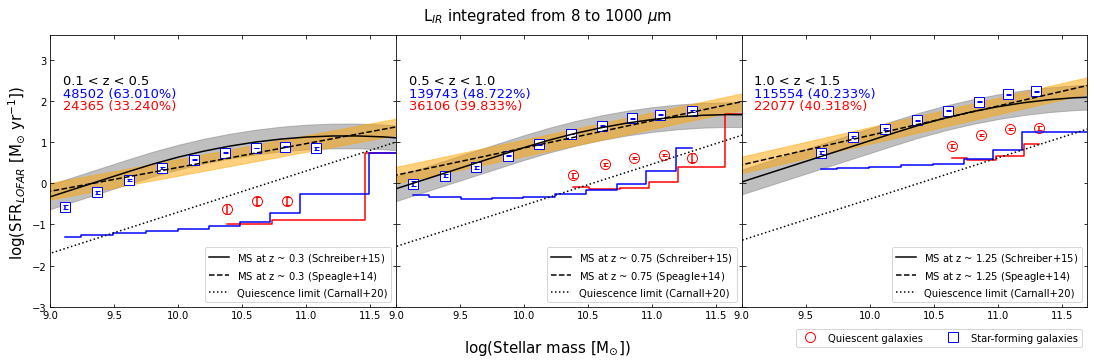

In [38]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    #axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

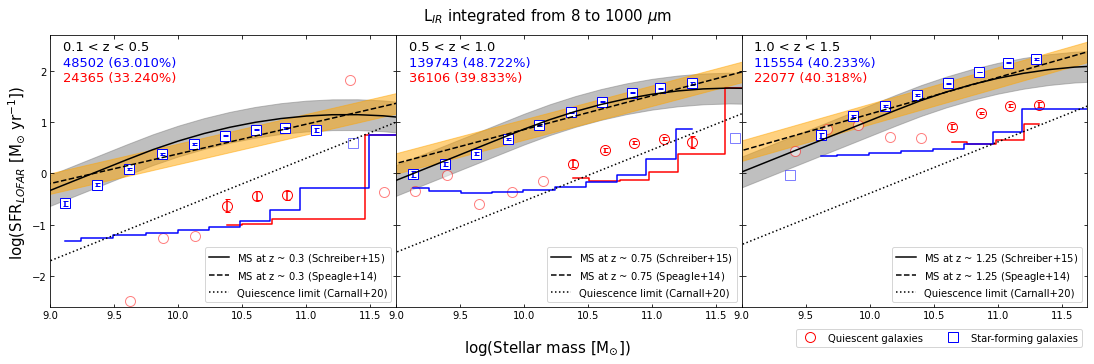

In [104]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   #yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

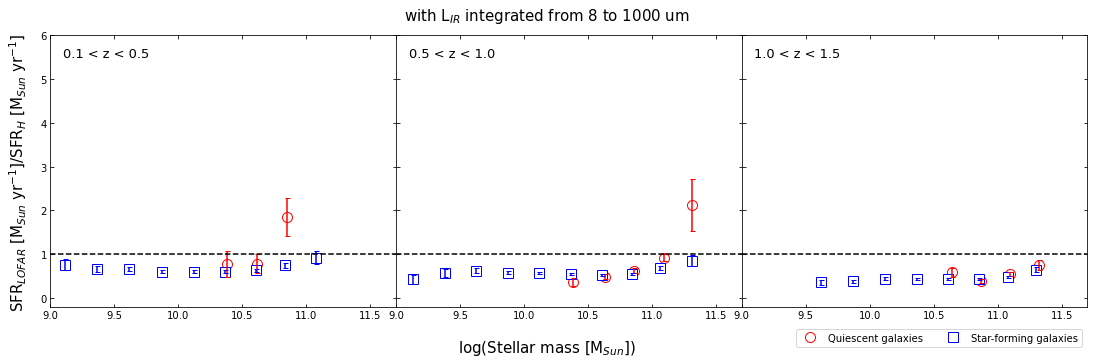

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

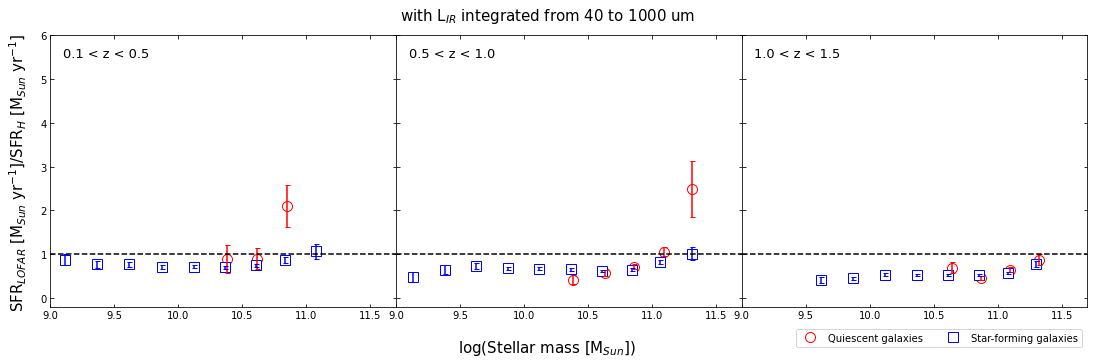

In [52]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR40_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

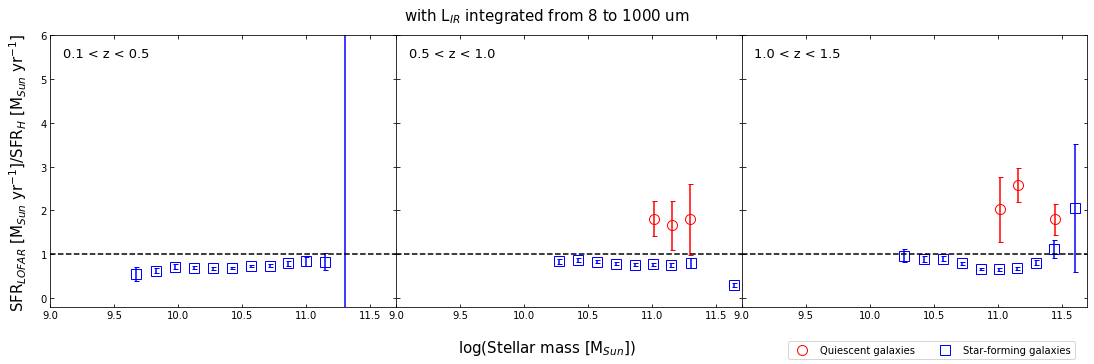

In [96]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                    data.loc[(data['Type']=='QG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='QG'),'SFR8_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                    data.loc[(data['Type']=='SFG'),'SFR8_ratio'],
                    yerr=data.loc[(data['Type']=='SFG'),'SFR8_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=6.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 8 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

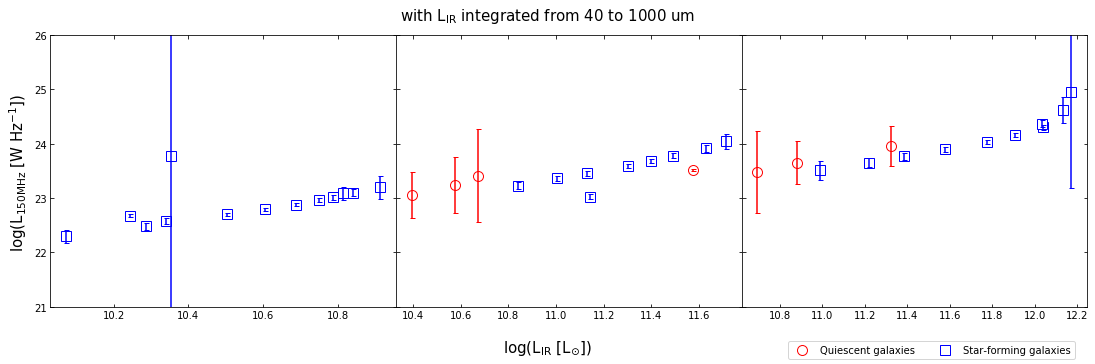

In [34]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='QG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='QG'),'SFR40_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'LIR40_median'],
                    np.log10(data.loc[(data['Type']=='SFG'),'L150MHZ']),
                    yerr=data.loc[(data['Type']=='SFG'),'SFR40_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    #axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
    #               data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
    #               marker='^',color='purple',label='_IR-bright "QGs"')
    #axs[i].plot([9,12],[1.,1.], ls='--', c='k')
    count = data['Count'].sum()
    #axs[i].text(9.1,5.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=21,ymax=26)
    #axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{\mathrm{IR}}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(L$_{\mathrm{IR}}$ [L$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(L$_{150 \mathrm{ MHz}}$ [W Hz$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

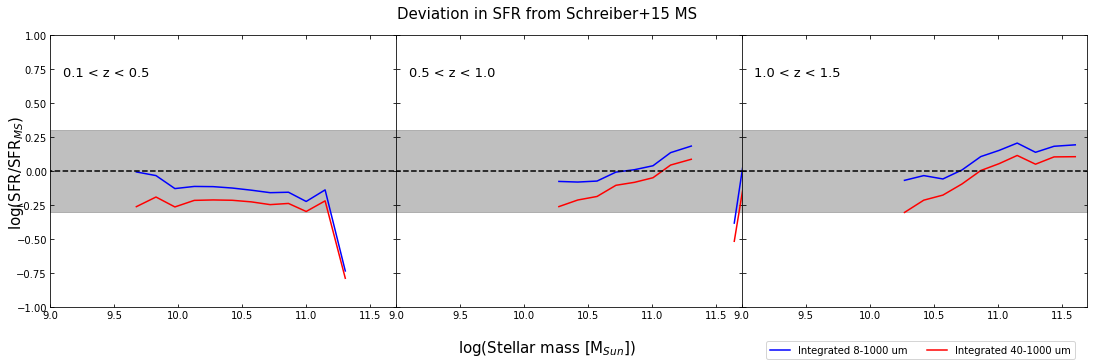

In [98]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SchreiberMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.3,-0.3],[0.3,0.3],alpha=0.5,color='grey')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Schreiber+15 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

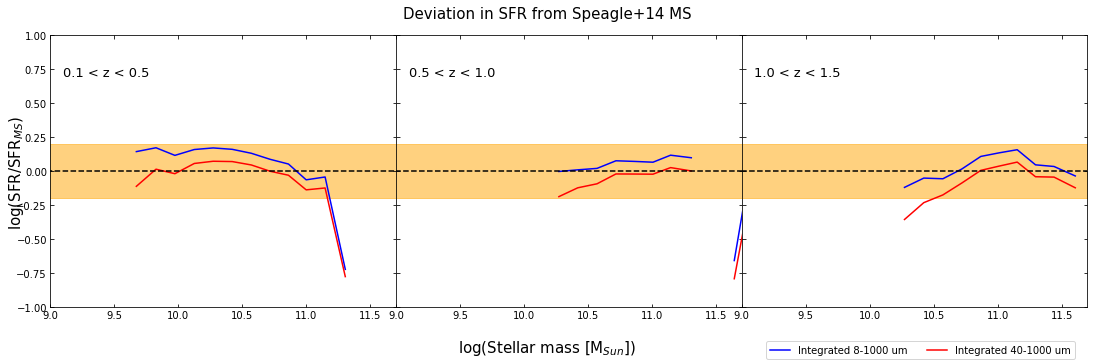

In [63]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='b', label=f'Integrated 8-1000 um')
    axs[i].plot(data.loc[(data['Type']=='SFG'),'Median_mass'],np.log10(data.loc[(data['Type']=='SFG'),'SFR40_median'])-SpeagleMS(data.loc[(data['Type']=='SFG'),'Median_mass'],z),ls='-', c='r', label=f'Integrated 40-1000 um')
    axs[i].plot([8,13],[0,0],ls='--',color='k')
    axs[i].fill_between([8,13],[-0.2,-0.2],[0.2,0.2],alpha=0.5,color='orange')
    axs[i].text(9.1,0.7,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1.0,ymax=1.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Deviation in SFR from Speagle+14 MS',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR/SFR$_{MS}$)", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],c='b', label=f'Integrated 8-1000 um')
marker2=plt.errorbar([],[],c='r', label=f'Integrated 40-1000 um')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

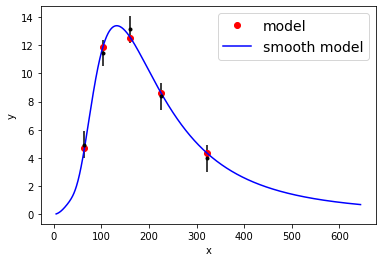

In [76]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[50,'100_flux(mJy)'],results_1.loc[50,'160_flux(mJy)'],results_1.loc[50,'250_flux(mJy)'],results_1.loc[50,'350_flux(mJy)'],results_1.loc[50,'500_flux(mJy)']])
yerr = np.array([results_1.loc[50,'100_std(mJy)'],results_1.loc[50,'160_std(mJy)'],results_1.loc[50,'250_std(mJy)'],results_1.loc[50,'350_std(mJy)'],results_1.loc[50,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/1.55, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/1.55,model((results_1.loc[50,'Tdust'],results_1.loc[50,'Norm']),x/(1.55))*10**3, "or", label="model")
plt.plot(x_new/1.55,model((results_1.loc[50,'Tdust'],results_1.loc[50,'Norm']),x_new/(1.55))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

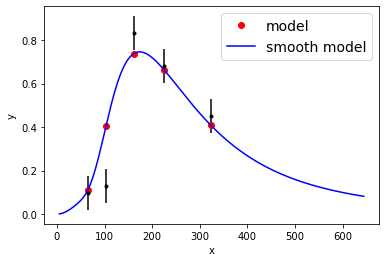

In [52]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[50,'100_flux(mJy)'],results.loc[50,'160_flux(mJy)'],results.loc[50,'250_flux(mJy)'],results.loc[50,'350_flux(mJy)'],results.loc[50,'500_flux(mJy)']])
yerr = np.array([results.loc[50,'100_std(mJy)'],results.loc[50,'160_std(mJy)'],results.loc[50,'250_std(mJy)'],results.loc[50,'350_std(mJy)'],results.loc[50,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/1.55, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/1.55,model((results.loc[50,'Tdust'],results.loc[50,'Norm']),x/(1.55))*10**3, "or", label="model")
plt.plot(x_new/1.55,model((results.loc[50,'Tdust'],results.loc[50,'Norm']),x_new/(1.55))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [55]:
bad_list = list(results.loc[(results['Type']=='QG')&(~np.isnan(results['SFR_H']))&(np.isnan(results['SFR8_median'])),['SFR_H','SFR8_median']].index)
print(bad_list)

[2, 3, 4, 8, 9, 10, 13, 14, 15, 16, 17, 23, 27, 28, 29, 30, 31, 36, 37]


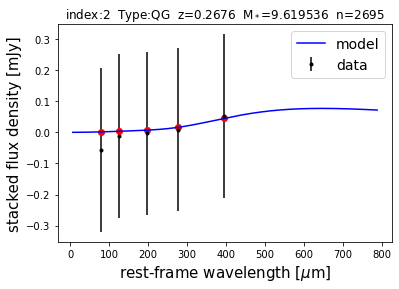

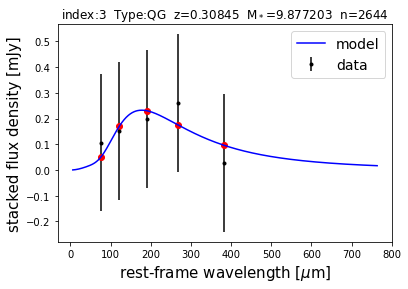

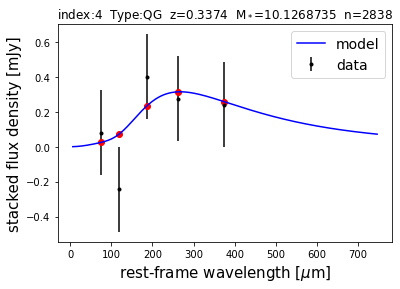

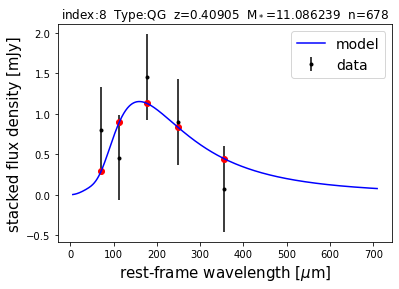

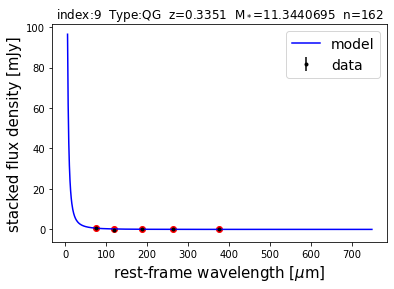

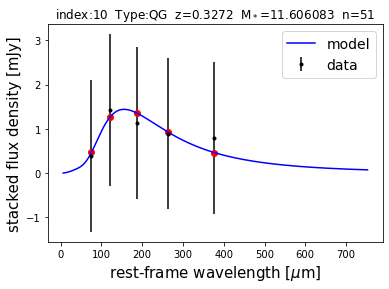

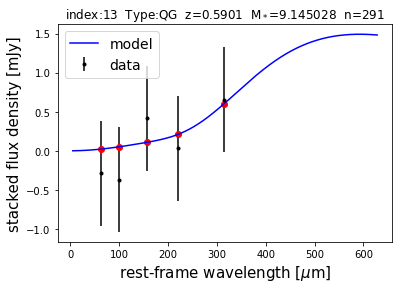

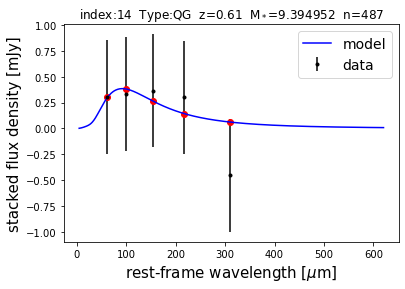

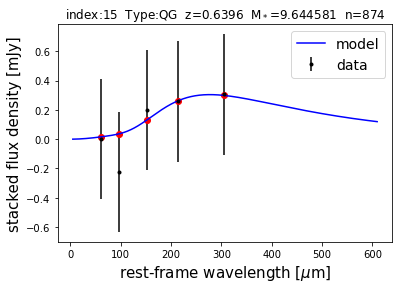

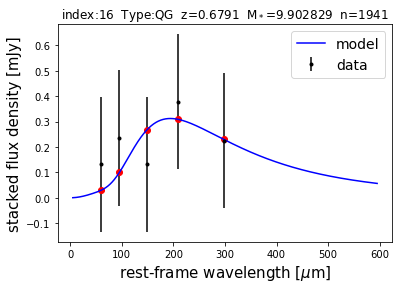

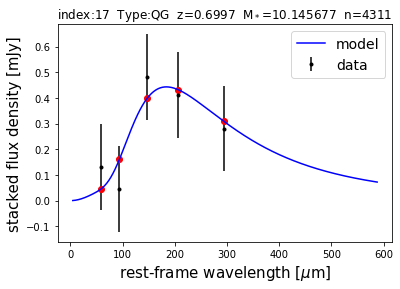

<ipython-input-46-1b206da5e45e>:7: RuntimeWarning: overflow encountered in exp
  flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a


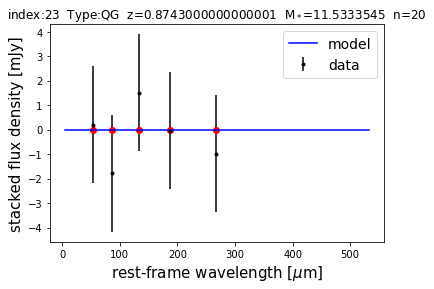

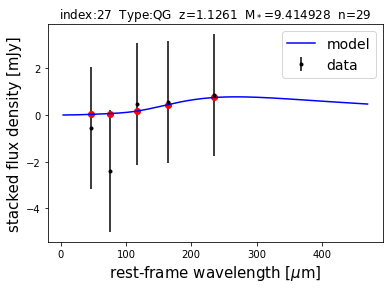

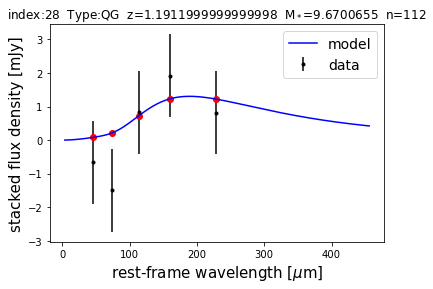

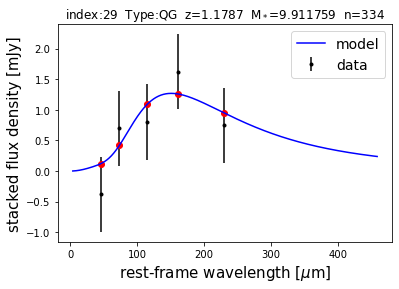

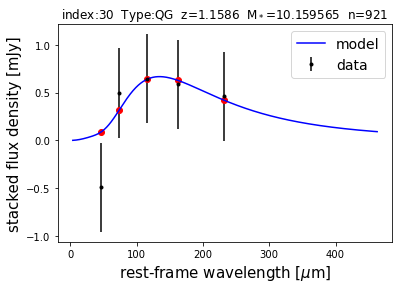

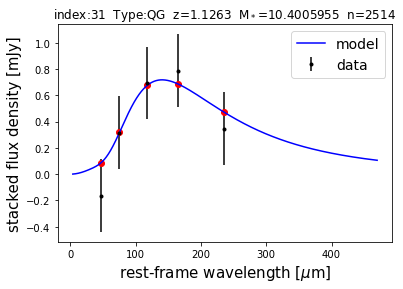

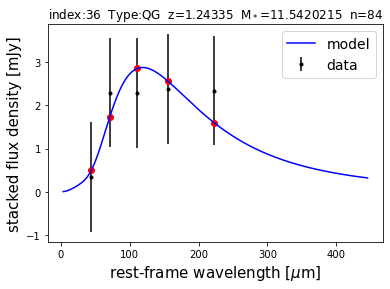

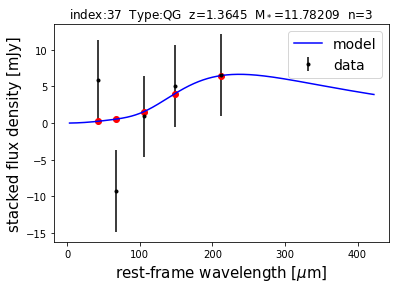

In [98]:
for n in bad_list:
    x = np.array([100.,160.,250.,350.,500.])
    y = np.array([results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)']])
    yerr = np.array([results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)']])
    z = results.loc[n,'Median_redshift']
    x_new = np.arange(8,1000)
    plt.errorbar(x/(1+z), y, yerr=yerr, fmt=".k", capsize=0, label="data")
    plt.plot(x/(1+z),model((results.loc[n,'Tdust'],results.loc[n,'Norm']),x/(1+z))*10**3, "or")
    plt.plot(x_new/(1+z),model((results.loc[n,'Tdust'],results.loc[n,'Norm']),x_new/(1+z))*10**3, "b", label="model")
    plt.legend(fontsize=14)
    #plt.xlim(0, 1000)
    plt.title('index:'+str(n)+'  Type:'+results.loc[n,'Type']+'  z='+str(results.loc[n,'Median_redshift'])+'  M$_*$='+str(results.loc[n,'Median_mass'])+'  n='+str(results.loc[n,'Count']))
    plt.xlabel("rest-frame wavelength [$\mu$m]",size=15)
    plt.ylabel("stacked flux density [mJy]",size=15)
    plt.show()
    plt.close()

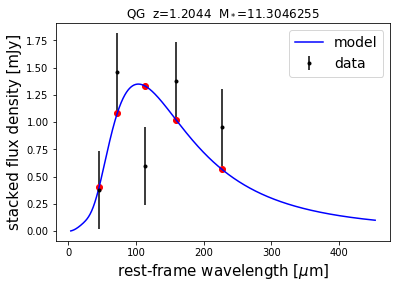

In [41]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[65,'100_flux(mJy)'],results.loc[65,'160_flux(mJy)'],results.loc[65,'250_flux(mJy)'],results.loc[65,'350_flux(mJy)'],results.loc[65,'500_flux(mJy)']])
yerr = np.array([results.loc[65,'100_std(mJy)'],results.loc[65,'160_std(mJy)'],results.loc[65,'250_std(mJy)'],results.loc[65,'350_std(mJy)'],results.loc[65,'500_std(mJy)']])
z = results.loc[65,'Median_redshift']

x_new = np.arange(8,1000)
plt.errorbar(x/(1+z), y, yerr=yerr, fmt=".k", capsize=0, label="data")
plt.plot(x/(1+z),model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x/(1+z))*10**3, "or")
plt.plot(x_new/(1+z),model((results.loc[65,'Tdust'],results.loc[65,'Norm']),x_new/(1+z))*10**3, "b", label="model")
plt.legend(fontsize=14)
#plt.xlim(0, 1000)
plt.title(results.loc[65,'Type']+'  z='+str(results.loc[65,'Median_redshift'])+'  M$_*$='+str(results.loc[65,'Median_mass']))
plt.xlabel("rest-frame wavelength [$\mu$m]",size=15)
plt.ylabel("stacked flux density [mJy]",size=15);

In [74]:
n = 50
chain_len = 10000
z = results.loc[n,'Median_redshift']
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)']])
yerr = np.array([results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)']])
initial = np.array([results.loc[n,'Tdust'],results.loc[n,'Norm']])
initial

array([2.11142635e+01, 2.58744515e+05])

In [75]:
ndim = len(initial)
nwalkers = 32
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/(1+z), y/1000, yerr/1000))
sampler.run_mcmc(p0, chain_len, progress=True);

100%|██████████| 10000/10000 [00:59<00:00, 168.90it/s]


In [68]:
tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
print(flat_samples.shape)

[40.99765857 41.24276459]
(15776, 2)


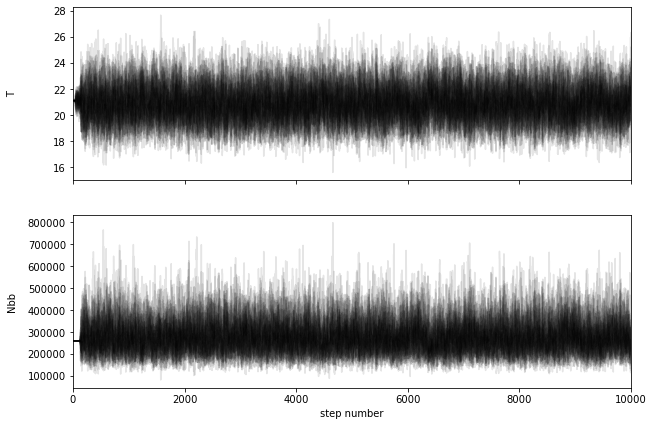

In [85]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

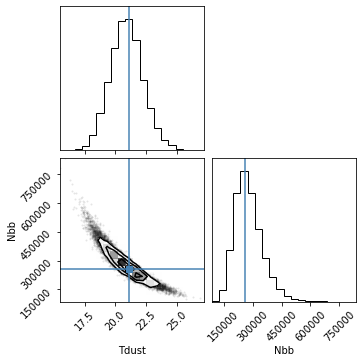

In [83]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results.loc[n,'Tdust'],results.loc[n,'Norm']]
);

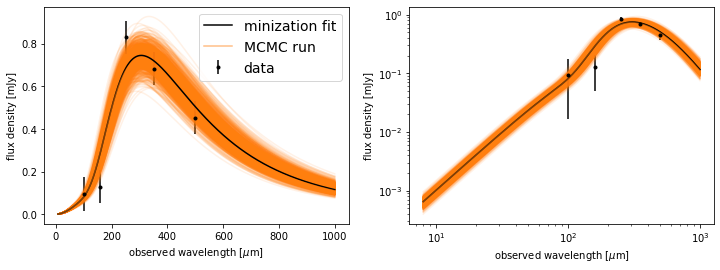

In [94]:
inds = np.random.randint(len(flat_samples), size=1000)
x_new = np.arange(8,1000)
fig, ax = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    for ind in inds:
        sample = flat_samples[ind]
        ax[i].plot(x_new, model(([sample[0],sample[1]]),x_new/(1+z))*1000, "C1", alpha=0.1)
    ax[i].errorbar(x, y, yerr=yerr, fmt=".k", label="data")#, capsize=0)
    ax[i].plot(x_new,model((results.loc[n,'Tdust'],results.loc[n,'Norm']),x_new/(1+z))*1000, "k", label="minization fit")
    ax[i].plot(x_new, model(([sample[0],sample[1]]),x_new/(1+z))*1000, "C1", alpha=0.5, label="MCMC run")
    #ax[i].xlim(0, 10)
    ax[i].set_xlabel("observed wavelength [$\mu$m]")
    ax[i].set_ylabel("flux density [mJy]")
ax[0].legend(fontsize=14,loc='upper right')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

In [84]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# FOR INTERNAL USE ONLY
#### Some plots that are not meant to be published (though they may be included in anexes). The point of these is mostly to check the consistency of the results by comparing them with some expected values

In [47]:
SFR_033 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(0.3).to(u.meter).value)**2) - 22.221)/1.058)
SFR_075 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(0.75).to(u.meter).value)**2) - 22.221)/1.058)
SFR_125 = 10**((np.log10((10**-29)*0.12*4*np.pi*(cosmo.luminosity_distance(1.25).to(u.meter).value)**2) - 22.221)/1.058)
masses = np.arange(9,12.25,0.25)

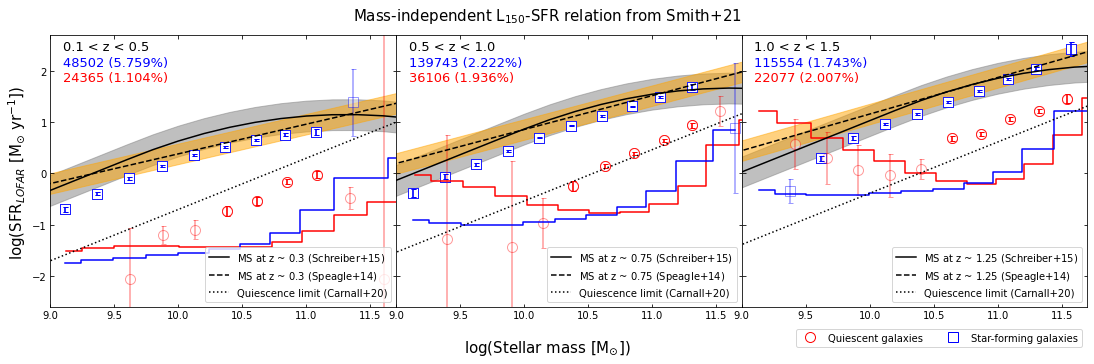

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_smith_unc']/(data.loc[(data['Type']=='QG'),'SFR_smith']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_smith']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_smith_unc']/(data.loc[(data['Type']=='SFG'),'SFR_smith']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


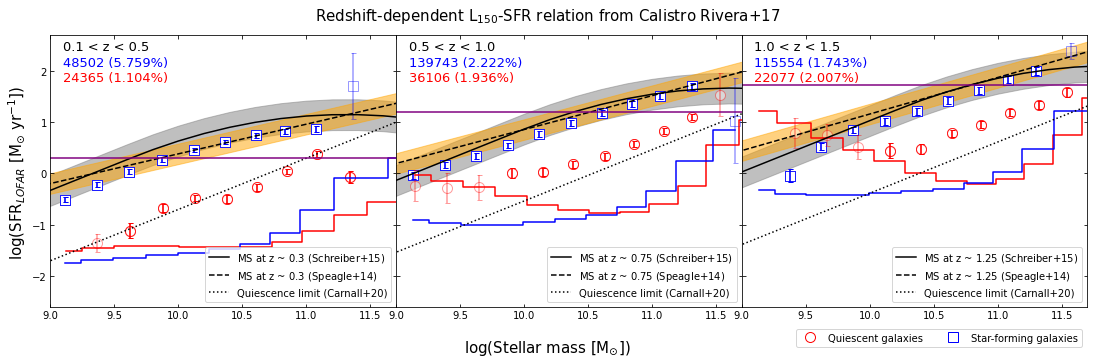

In [45]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.4,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.4,label='_Star-forming galaxies')
    axs[i].step(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','Radio_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','Radio_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

In [102]:
flux_lim = pd.read_csv(path+'Results/Bootes_Herschel_depth.csv')
flux_lim

pacs_100_pix  pacs_160_pix  spire_250_beam  spire_350_beam  spire_500_beam  \
0      1.149182      1.336372        7.228171        7.318360        8.306016   
1      0.906200      1.042286        7.228171        7.318360        8.306016   
2      3.356399      5.048370       21.531144       19.950767       20.563881   
3      3.973289      6.015545       21.531144       19.950767       20.563881   
4           NaN           NaN        7.000000        7.500000       13.000000   

   pacs_100_beam  pacs_160_beam   Tdust_03       Norm_03   LIR_H_03  \
0      15.052586      20.357979  39.609918  7.063704e+05  10.853297   
1      11.869885      15.877934  36.222156  7.841522e+05  10.734541   
2      43.963857      76.905676  38.752787  2.525143e+06  11.366555   
3      52.044205      91.639404  40.270196  2.580748e+06  11.446167   
4       0.800000       2.400000   8.893827  1.395527e+08  10.101365   

    SFR_H_03  Tdust_075      Norm_075  LIR_H_075   SFR_H_075  Tdust_125  \
0   7.234691  58.633583  1.939880e+05  11.944329   89.217824  80.172339   
1   5.503820  53.194761  2.167731e+05  11.820543   67.091250  72.417795   
2  23.587295  57.527331  6.814509e+05  12.456433  290.105846  78.959972   
3  28.332839  60.029583  6.931823e+05  12.538786  350.678523  82.602361   
4   1.280819  12.364468  3.502756e+07  11.181345   15.398131  16.576309   

       Norm_125  LIR_H_125    SFR_H_125  
0  7.242598e+04  12.609023   412.236471  
1  8.108435e+04  12.482132   307.790515  
2  2.498785e+05  13.120574  1338.743276  
3  2.535838e+05  13.204688  1624.841022  
4  1.073491e+07  11.838381    69.904273

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


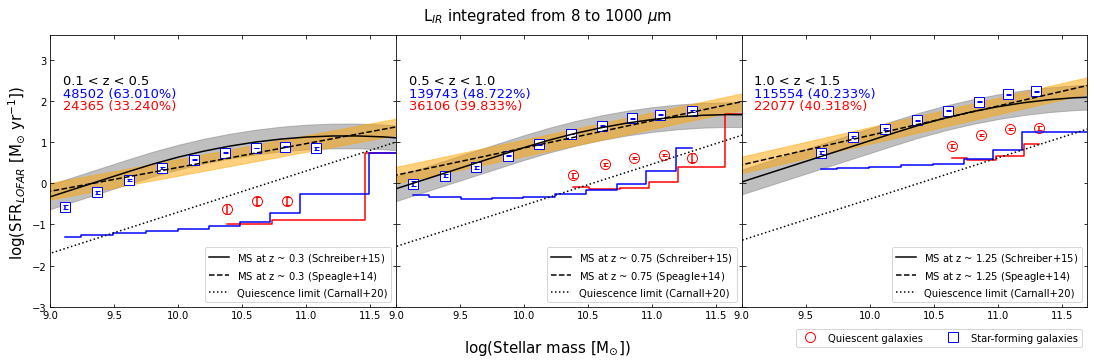

In [38]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    #axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/bruno/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


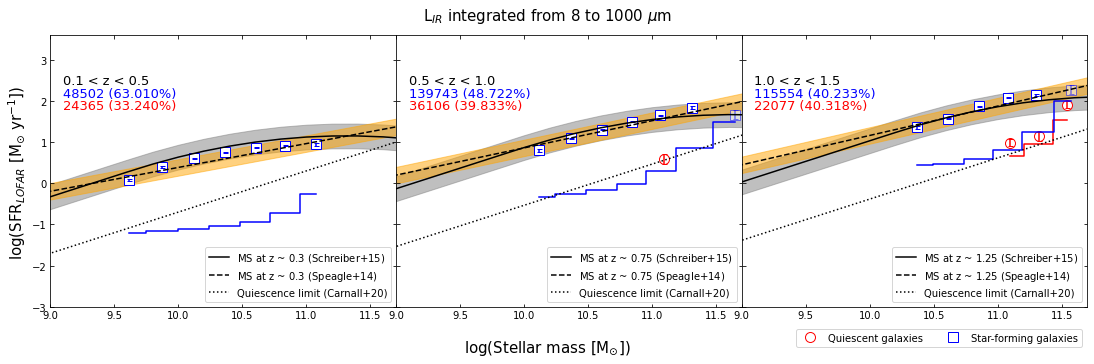

In [81]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[flux_lim.loc[1,'SFR_H_03'],flux_lim.loc[1,'SFR_H_075'],flux_lim.loc[1,'SFR_H_125']]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']<=3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,alpha=0.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,alpha=0.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)&(results['LOFAR_flux(mJy)']>3*results['LOFAR_std(mJy)'])]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR8_upper']/(data.loc[(data['Type']=='QG'),'SFR8_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR8_median']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR8_upper']/(data.loc[(data['Type']=='SFG'),'SFR8_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)&(results['Detections']==1)]
    axs[i].step(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='QG')&(data['SFR8_median']>0),'Count'])),
                color='r',where='mid')
    axs[i].step(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Median_mass'],
                np.log10(sfrlim/np.sqrt(data.loc[(data['Type']=='SFG')&(data['SFR8_median']>0),'Count'])),
                color='b',where='mid')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].fill_between(m,SchreiberMS(m,z)-0.3,SchreiberMS(m,z)+0.3,alpha=0.5,color='grey')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    axs[i].fill_between(m,SpeagleMS(m,z)-0.2,SpeagleMS(m,z)+0.2,alpha=0.5,color='orange')
#    axs[i].axhline(np.log10(sfrlim),c='purple')
    SFG, SFGdetec = data.loc[(data['Type']=='SFG')&(data['Detections']==1),['Count','IR_detected']].sum()
    QG,  QGdetec  = data.loc[(data['Type']=='QG')&(data['Detections']==1), ['Count','IR_detected']].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].text(9.1,2.1,f'{SFG} ({SFGdetec/SFG:.3%})',size=13,color='b')
    axs[i].text(9.1,1.8,f'{QG} ({QGdetec/QG:.3%})',size=13,color='r')
    #axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('L$_{IR}$ integrated from 8 to 1000 $\mu$m',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{\odot}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='w',mec='b',ms=10,ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

## Comparing SFR from stacks with and without radio detections

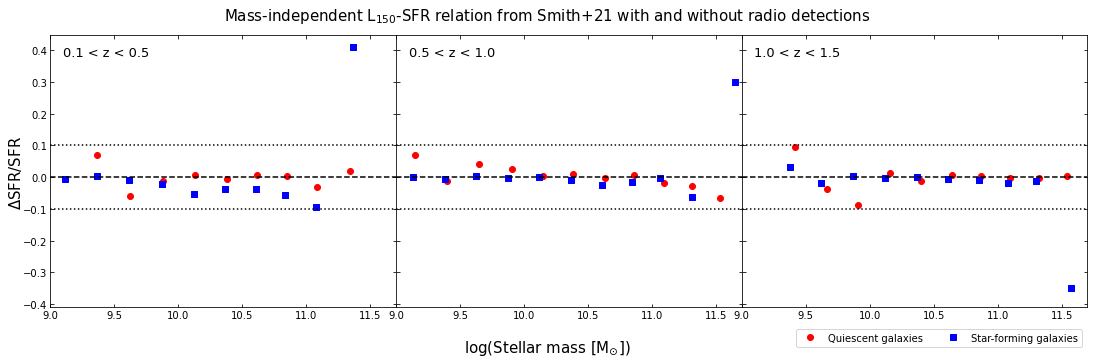

In [8]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_smith']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_smith']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

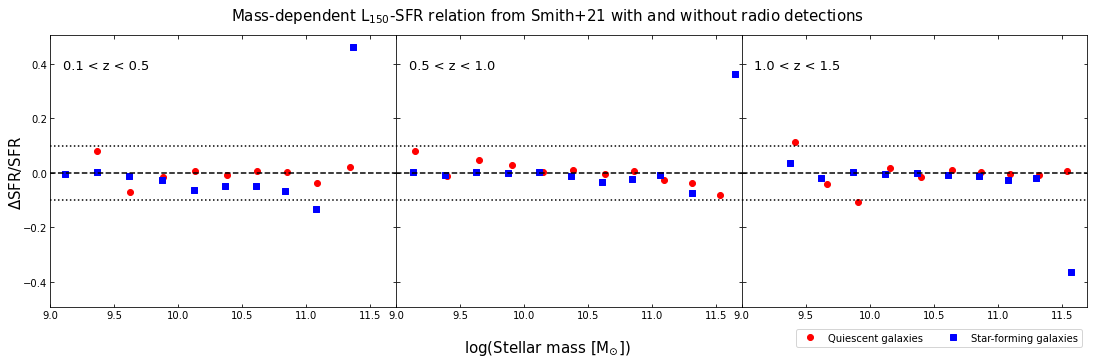

In [9]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith_M'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_smith_M']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_smith_M']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith_M'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_smith_M']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_smith_M']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

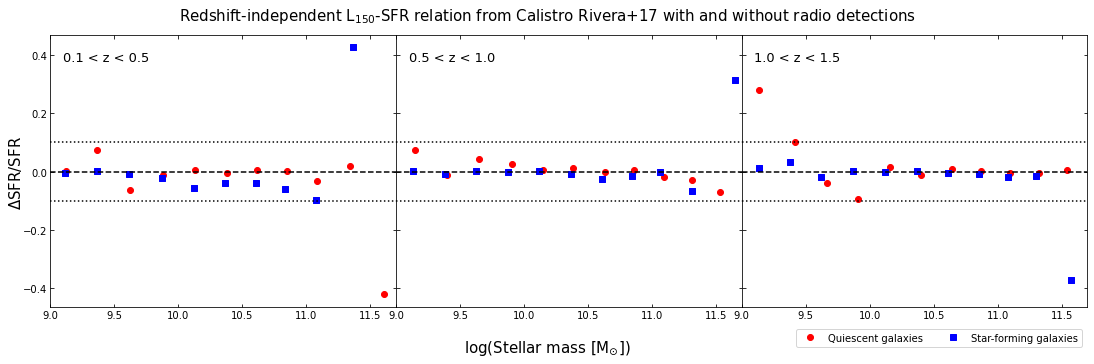

In [10]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CR'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_CR']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CR']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CR'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_CR']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CR']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Calistro Rivera+17 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

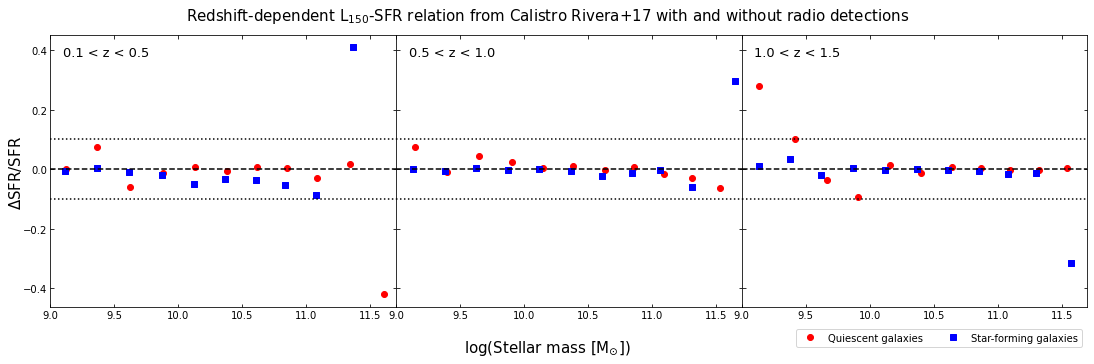

In [11]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CRz'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_CRz']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_CRz']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CRz'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_CRz']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_CRz']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].plot([9,11.7],[0.1,0.1],':',c='k')
    axs[i].plot([9,11.7],[-0.1,-0.1],':',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
#    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Calistro Rivera+17 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

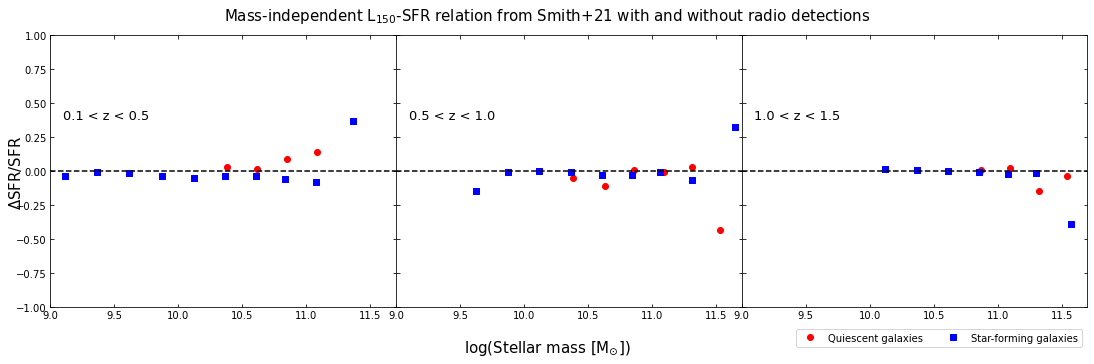

In [153]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb,sfrlim in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[SFR_033,SFR_075,SFR_125]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].scatter(data.loc[(data['Type']=='QG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_H'])-np.array(data.loc[(data['Type']=='QG')&(data['Detections']==0),'SFR_H']))/np.array(data.loc[(data['Type']=='QG')&(data['Detections']==1),'SFR_H']),
                   marker='o',color='r',label='Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'Median_mass'],
                   (np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_H'])-np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==0),'SFR_H']))/np.array(data.loc[(data['Type']=='SFG')&(data['Detections']==1),'SFR_H']),
                   marker='s',color='b',label='Star-forming galaxies')
    axs[i].plot([9,11.7],[0,0],'--',c='k')
    axs[i].text(9.1,0.38,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-1,ymax=1)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+21 with and without radio detections',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{\odot}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"$\Delta$SFR/SFR", va='center',fontsize=15, rotation='vertical')
marker1=plt.errorbar([],[],fmt='o',mfc='r',mec='r',ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],fmt='s',mfc='b',mec='b',ecolor='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='lower right',bbox_to_anchor=(1,0),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

# OLDER PLOTS
#### These plots are not currently in use, but may prove helpful in the future

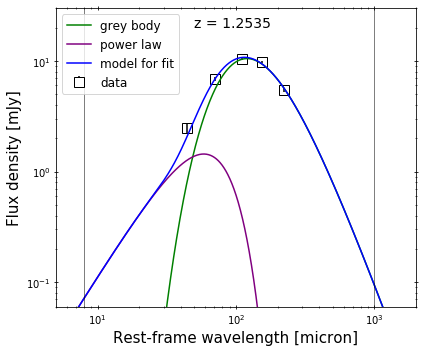

In [139]:
def Greybody(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for dust-dominated FIR regime
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1)
    return flux

def PL(x,Lc,Npl):
    '''Flux density in Jy at wavelength x in micron
    for PAH-dominated MIR regime
    given by a power-law
    Lc is the turnover wavelength 
    Nbl is a normalization parameter'''
    alpha = 2.0
    #flux = Npl*np.exp(-(x/(Lc*3/4))**2)*(x/Lc)**alpha
    flux = Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

T = results.loc[60,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[60,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[60,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

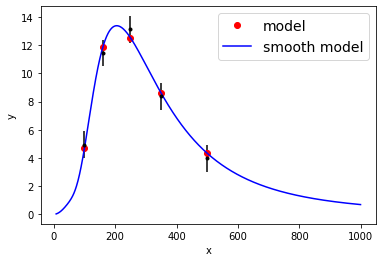

In [75]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

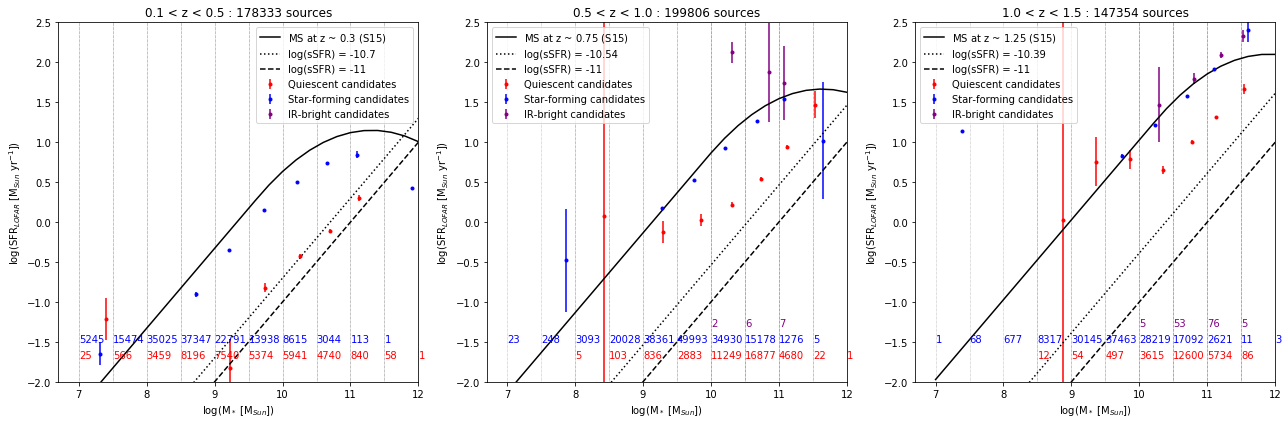

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

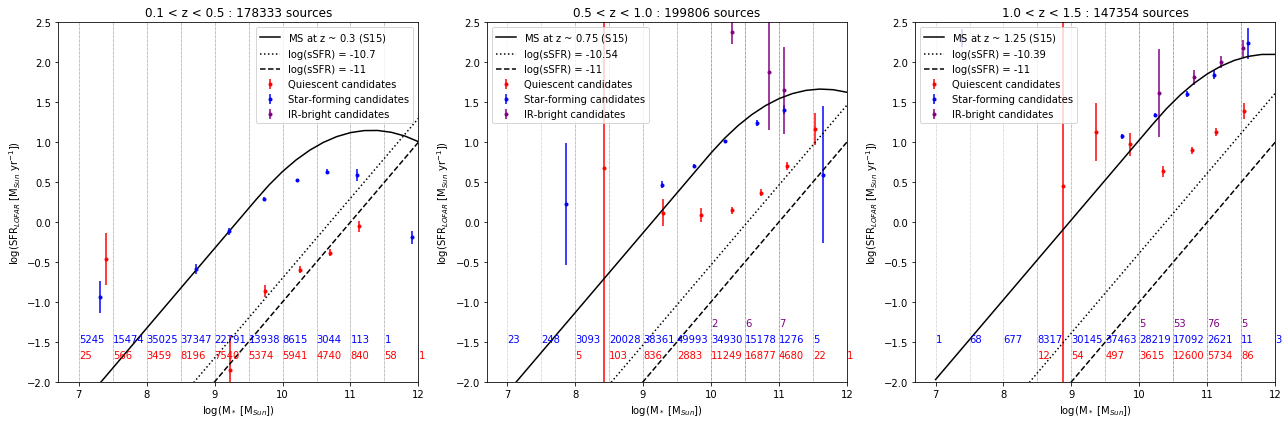

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

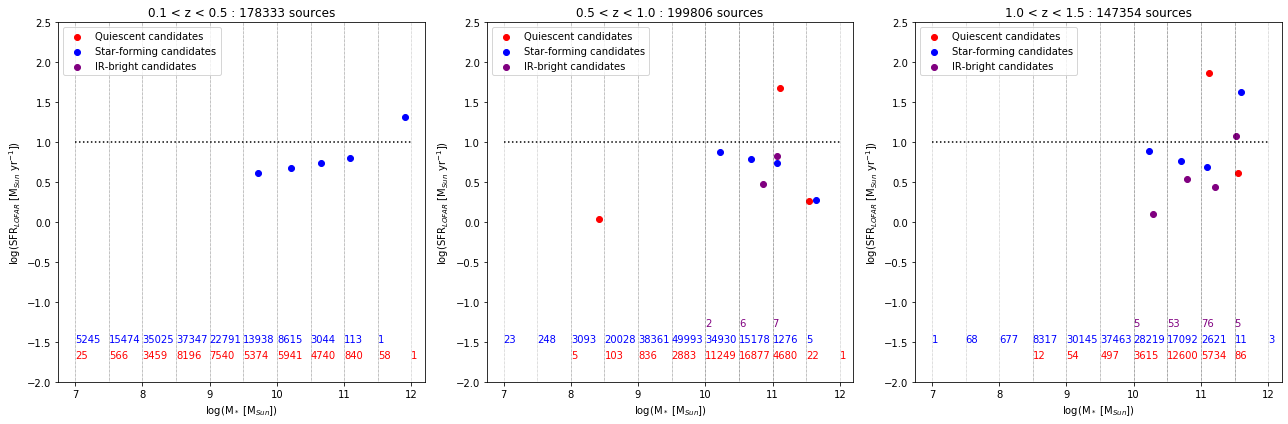

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

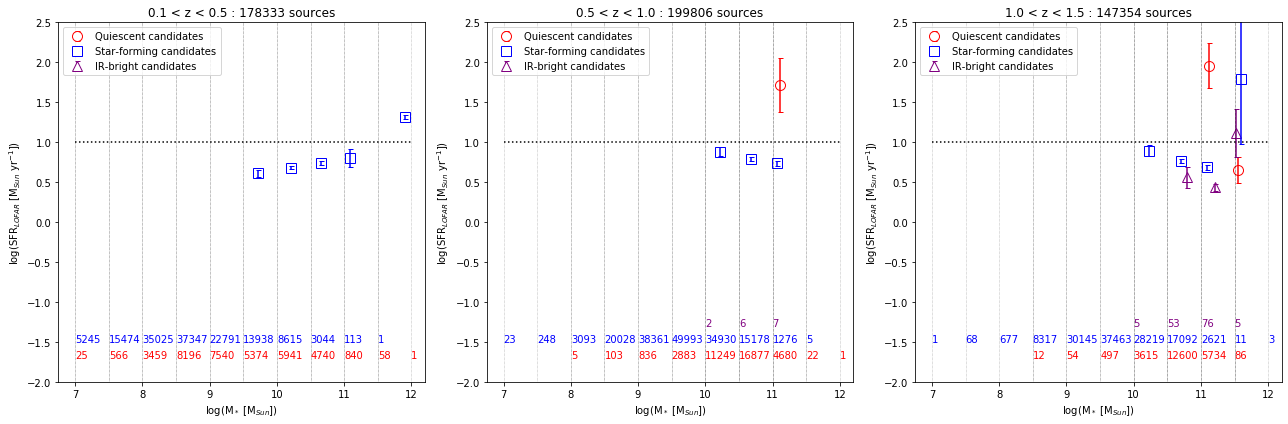

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()